In [6]:
import os
import sys
HOME_DIR='G:'+os.sep+'Il Mio Drive'+os.sep+'SECRET-ITN'+os.sep+'Projects'+os.sep+'network_signing'+os.sep+'SIGNAL_release'+os.sep
HOME_DIR='G:'+os.sep+'My Drive'+os.sep+'SECRET-ITN'+os.sep+'Projects'+os.sep+'network_signing'+os.sep+'SIGNAL_release'+os.sep

sys.path.append(HOME_DIR)
from glob_vars import SPECIES, TRAIN_DATA, PERT_MAP, LBL_DIR,EDGES_DIR,\
    FT_DIR, SIGNAL_DIR, MOD_DIR, PRT_DIR, NET_DIR,  NET_FILE,\
    PROPAGATE_ALPHA, PROPAGATE_EPSILON ,PROPAGATE_ITERATIONS, DICT_DIR,\
    DICT_FILE, get_terms, get_anchors
import pickle
import collections
import itertools
import lxml.etree as etree
import os
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
print(SPECIES)
print(TRAIN_DATA)
print(PERT_MAP)


S_cerevisiae
['patkar_kegg', 'kpi', 'ubinet2']
Kemmeren


In [5]:

with open( DICT_DIR+DICT_FILE, 'rb') as f:
    alias_2geneid = pickle.load(f)
geneid2alias ={y:x for (x,y) in alias_2geneid.items()}


FILENAME = 'TLM_strong_normal.edges_'+PERT_MAP+'._patkar_kegg_kpi_ubinet2_'+PERT_MAP+'.sgnl'#'TLM_all_KOterms_850696'#TLM_all_KOterms
SIGNAL_scores=pd.read_csv(SIGNAL_DIR+FILENAME, sep=' ', header=None, names=['id1','id2','SIGNAL'])
SIGNAL_scores

,id1,id2,SIGNAL
0,851306,852984,0.492500
1,851306,855512,0.562500
2,855505,852294,0.510000
3,855505,856351,0.609625
4,855505,850636,0.603333
...,...,...,...
201,854806,855104,0.576136
202,851174,852190,0.439167
203,851174,855652,0.576500
204,856163,856657,0.492500


# all TLM data edges SIGNAL scores distribution

<Axes: >

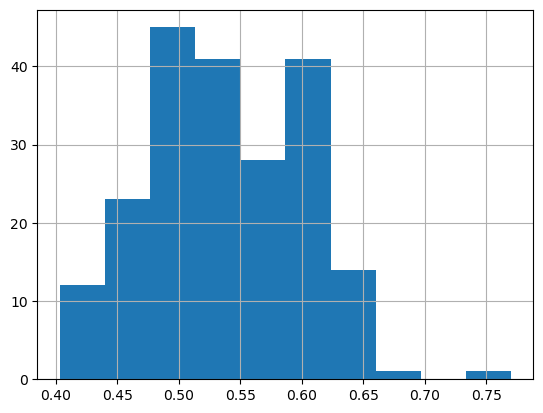

In [3]:
SIGNAL_scores.SIGNAL.hist()

# Only Vstrong and strong TLM data SIGNAL scores distribution

<Axes: >

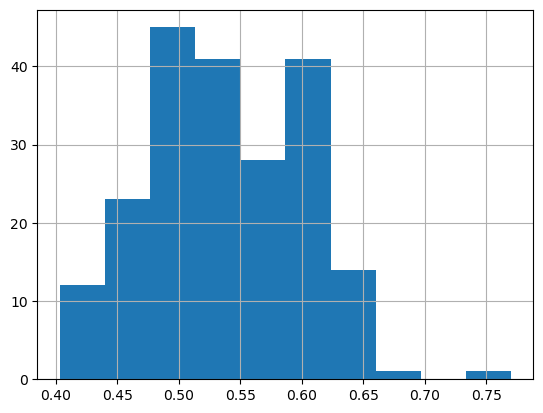

In [4]:
SIGNAL_scores.SIGNAL.hist()

more evident bimodal distribution!

## comparison, SIGNAL training data SIGNAL score distribution

<Axes: >

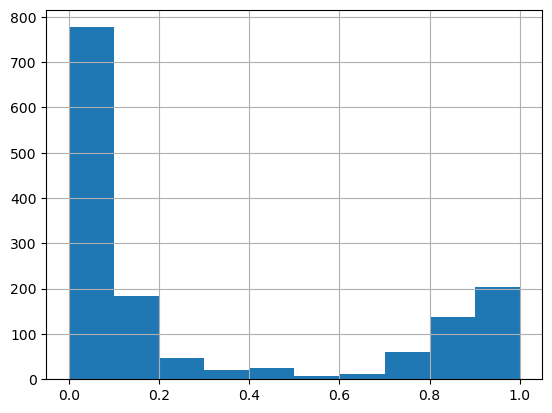

In [5]:
train_SIGNAL = pd.read_csv(SIGNAL_DIR+'alltrain_patkar_kegg_kpi_ubinet2_Kemmeren.sgnl',sep=' ', header=None)
train_SIGNAL[2].hist()

In [6]:
SIGNAL_scores['SIGNAL'].describe()

count    206.000000
mean       0.539096
std        0.063688
min        0.403333
25%        0.491875
50%        0.535229
75%        0.594635
max        0.770000
Name: SIGNAL, dtype: float64

# Compare to experimental data:

# Usage:
      - step 1: Features creation:
    
       SIGNAL_ft_gen_iterative.py can be called in two main ways to generate features:
            1.from the command line 
  `python SIGNAL_ft_gen_iterative.py -s S_cerevisiae -e edges_file -n network_file -p perturbations_file`
   
           2. import functions in a different python script by:
   `from SIGNAL_ft_gen_iterative import generate_similarity_matrix_wrapper, generate_features_different_knockouts_iterative`
      for multi-threading option, use SIGNAL_ft_gen_parallel.py and import generate_features_different_knockouts function

In [23]:
TERMS=get_terms(termfile='TLM_strong_normal_phenotype')
ANCHORS=get_anchors()
print(len(TERMS), len(ANCHORS))

140 12


In [24]:
# map back anchors and terms to genes
# make sure they re there (some terms are left out due to anat max input size)
ALL_GENES = np.unique(list(SIGNAL_scores['id1'])+list(SIGNAL_scores['id2']))
len(ALL_GENES)


163

In [9]:
alias_2geneid['NSR1'] 

853064

In [42]:
anchor_to_skip=[]
for anchor in ANCHORS:
    anchorid=alias_2geneid[anchor] 
    if not anchorid in ALL_GENES:
        print(anchor, anchorid)
        anchor_to_skip.append(anchor)

EST2 851028
TEN1 850696


TEN1 missing because disconnected from the rest of ANAT network. EST2 as well with TLM strong normal phenotype

In [25]:
t=0
TERMS2=[]
for term in TERMS:
    termid=alias_2geneid[term]
    if not termid in ALL_GENES:
        print(term, termid)
    else:
        t+=1
        
        TERMS2.append(term)
print(t)
TERMS=TERMS2 # only use terms actually used (VALE SOLO PER TLM_ALL_KOTERMS)
    

EST2 851028
139


EST2  not present for TLM strong normal data

In [26]:
# Ci sono 12 terms che sono anche anchors, non sono stati contati come terminals da anat aoutomaticamente, ma leviamoli dalla variabile
print(len(TERMS))
to_remove=[]
for term in TERMS:
    if term in ANCHORS:
        print(term)
        to_remove.append(term)
TERMS3=[i for i in TERMS if not i in to_remove]
TERMS=TERMS3
print(len(TERMS))

139
STN1
RIF1
RIF2
EST1
EST3
YKU70
YKU80
132


In [27]:
# sono i 12 anchors, non sono stati contati come terminals da anat aoutomaticamente, ma leviamoli dalla variabile

In [28]:
# map to anchor and term etc
id2name = {alias_2geneid[gene]:gene for gene in ANCHORS+TERMS}
def renamegene(x):
    if x in id2name.keys():
        return id2name[x]
    return x

def label(x):
    if x in ANCHORS:
        return('A')
    if x in TERMS:
        return('T')
    else:
        return('O')

SIGNAL_scores['name1'] = SIGNAL_scores['id1'].apply( lambda x: renamegene(x))
SIGNAL_scores['name2'] = SIGNAL_scores['id2'].apply( lambda x: renamegene(x))
SIGNAL_scores['name1lbl'] = SIGNAL_scores['name1'].apply( lambda x: label(x))
SIGNAL_scores['name2lbl'] = SIGNAL_scores['name2'].apply( lambda x: label(x))

In [29]:
SIGNAL_scores

,id1,id2,SIGNAL,name1,name2,name1lbl,name2lbl
0,851306,852984,0.492500,CDC13,852984,A,O
1,851306,855512,0.562500,CDC13,855512,A,O
2,855505,852294,0.510000,RAP1,852294,A,O
3,855505,856351,0.609625,RAP1,856351,A,O
4,855505,850636,0.603333,RAP1,850636,A,O
...,...,...,...,...,...,...,...
201,854806,855104,0.576136,EST3,NAM7,A,T
202,851174,852190,0.439167,RIF2,TEL1,A,T
203,851174,855652,0.576500,RIF2,RNH201,A,T
204,856163,856657,0.492500,MAK3,MAK10,T,T


# Extract SIGNAL values for all paths


In [46]:
SIGNAL_net = nx.from_pandas_edgelist(SIGNAL_scores, 'name1','name2','SIGNAL') # turn to network
len(SIGNAL_net.edges)

206

In [47]:
# USE SIGNAL_of to use all PATHWASY, use SIGNAL_of_avg to use only avg
# 20-09-2024 added fix to account for lack of paths in disconnected networks.

SIGNAL_of = {}
SIGNAL_of_avg = {}

# 
def generate_edges_from_path(path):
    edges=[]
    first=True
    i=0
    for j in path:
        if first:
          first=False
        else:
            edges.append((i,j))
        i=j
    return edges
    

for anchor in ANCHORS:
    if not anchor in anchor_to_skip: # disconnected from net (TEN1  for all data, EST2 only valid with TLM strong normal data)
        for term in TERMS:
            print('anchor',anchor,'term',term)
            if nx.has_path(SIGNAL_net, anchor, term):
                paths = list(nx.all_shortest_paths(SIGNAL_net, anchor, term))
            
                        
                # Extract SIGNAL values for all paths
                allSIGNALS=np.zeros((len(paths),len(paths[0])-1))
                for i, path in enumerate(paths):
                    edges = generate_edges_from_path(path)
                    SIGNALs=[SIGNAL_net.edges[edge]['SIGNAL'] for edge in edges]
                    allSIGNALS[i]=SIGNALs
                SIGNAL_of[(anchor,term)]= allSIGNALS 
                avgSIGNALS=allSIGNALS.mean(axis=0) # take per-edge mean of all paths
                SIGNAL_of_avg[(anchor,term)]= avgSIGNALS
                print('avgSIGNALS',avgSIGNALS)

anchor EST1 term RAD27
anchor EST1 term ASC1
avgSIGNALS [0.52333333 0.53      ]
anchor EST1 term SPP382
avgSIGNALS [0.52333333 0.59534722]
anchor EST1 term CBC2
avgSIGNALS [0.609625 0.609625]
anchor EST1 term ELG1
anchor EST1 term HCM1
avgSIGNALS [0.5275     0.58736111 0.51590909 0.51      ]
anchor EST1 term HMO1
avgSIGNALS [0.53289323 0.6058967  0.57377344 0.59819792 0.51       0.43583333]
anchor EST1 term HPR1
avgSIGNALS [0.609625   0.609625   0.58333333]
anchor EST1 term HTL1
avgSIGNALS [0.53289323 0.6058967  0.57377344 0.59819792 0.51       0.46392857]
anchor EST1 term IMG2
avgSIGNALS [0.5275     0.58736111 0.51590909 0.43       0.65333333 0.48      ]
anchor EST1 term LDB7
avgSIGNALS [0.5275     0.58736111 0.51590909 0.53      ]
anchor EST1 term LEA1
avgSIGNALS [0.609625 0.609625 0.54    ]
anchor EST1 term MAK10
avgSIGNALS [0.52787879 0.60351641 0.53478512 0.53170455 0.4925    ]
anchor EST1 term MAK3
avgSIGNALS [0.52787879 0.60351641 0.53478512 0.53170455]
anchor EST1 term MAK31
av

# Calculate probability of being negative with chain rule

## apply chain rule to SIGNAL_of

In [49]:
def chain_rule(p_minus):
# find all odd indexes <= len(p_minus)

    p_minus=np.array(p_minus)
    cum_prob=0
    n_steps = len(p_minus)
    odd_nums=[number for number in range(n_steps + 1) if number % 2 != 0]
    # odd_nums=[1,3,5]
    for odd_num in odd_nums: 
        # find all combinations of steps with ind (i.e. 3 minuses
        
        minus_list = np.array([-1]*odd_num+[+1]*(n_steps-odd_num))
        #minus_list = ['-', '-', '-', '+', '+']
        
        #find cobinations
        current_combs = set(itertools.permutations(minus_list,n_steps))

        curr_cum_prob=0
        for signs in current_combs:
            # map + to p_plus and - to p_minus
            probs = np.where(np.array(signs)==-1, p_minus, 1-p_minus)
            probs=np.prod(probs)
            curr_cum_prob+=probs
        cum_prob+=curr_cum_prob
    return cum_prob

def p_of_at_least_one_event_happening(list_of_p): 
    # for combinign all AT shortest paths
    return 1-np.prod([1-p for p in list_of_p])

def proportion_of_negative(out_p_list, t=0.5):
    if len(out_p_list)>1:
        return sum(np.where(np.array(out_p_list)>t, 1,0))/len(out_p_list)
    elif len(out_p_list)==1:
        return out_p_list[0]
    else:
        raise ValueError('empty list')
#
def expected_num_negative(out_p_list): #!!
    if len(out_p_list)>0:
        return sum(out_p_list)/len(out_p_list)
    else:
        raise ValueError('empty list')

### v1 and 2 

In [84]:
# in the end, choose one out of these four dictionaries.
# first version is pred_phenotype_term_avg

pred_phenotype_term = {} #v1
pred_AT_output ={} # v2 same as above dictionary, but key has also anchor info . leads to worse predictions, use v1
for key, p_minus_list in SIGNAL_of.items():

    print(key)
    # All paths

    out_p_list= []
    for p_minus in p_minus_list:
        p_output=chain_rule(p_minus) # calculate probability of single path having negative output
        out_p_list.append(p_output)
    pred_phenotype_term[key[1]]=p_of_at_least_one_event_happening(out_p_list) # calculate probability of at least one negative outcome path to realize 
    pred_AT_output[key] = p_of_at_least_one_event_happening(out_p_list) #v2
    print('probability of negative output', pred_phenotype_term[key[1]])

pred_phenotype_term_avg = {} #v1
pred_AT_output_avg ={} # v2 same as above dictionary, but key has also anchor info . leads to worse predictions, use v1

for key, p_minus_list in SIGNAL_of_avg.items():
    # average paths
    print('avg')
    p_minus = p_minus_list
    p_output=chain_rule(p_minus)
    pred_phenotype_term_avg[key[1]]=p_output #v1
    pred_AT_output_avg[key] = p_output #v2
    
    print('probability of negative output', pred_phenotype_term[key[1]])

('EST1', 'AAR2')
probability of negative output 0.4994333333333333
('EST1', 'ADE12')
probability of negative output 0.500032
('EST1', 'ADO1')
probability of negative output 0.5000006518518518
('EST1', 'AGP2')
probability of negative output 0.9687500860224598
('EST1', 'AHC2')
probability of negative output 0.999023407027887
('EST1', 'ALA1')
probability of negative output 0.5010666666666667
('EST1', 'APC4')
probability of negative output 0.49839999999999995
('EST1', 'APE3')
probability of negative output 0.9960937693596265
('EST1', 'RAD27')
probability of negative output 0.9999923711566594
('EST1', 'ARC15')
probability of negative output 0.49999822222222223
('EST1', 'ARC35')
probability of negative output 0.5000426666666666
('EST1', 'ARD1')
probability of negative output 0.9921881324856064
('EST1', 'ARF1')
probability of negative output 0.9921888352136293
('EST1', 'ARG2')
probability of negative output 0.7499995054198205
('EST1', 'ARP2')
probability of negative output 0.49992088888888886

probability of negative output 1.0
('EST1', 'MET18')
probability of negative output 0.9999999701962654
('EST1', 'MET7')
probability of negative output 0.7500001413086474
('EST1', 'MFT1')
probability of negative output 0.9999999701985176
('EST1', 'MLH1')
probability of negative output 0.49999871571428556
('EST1', 'MLP2')
probability of negative output 0.8749700510656034
('EST1', 'MMM1')
probability of negative output 0.9960937887232283
('EST1', 'MMS21')
probability of negative output 0.9999999403953092
('EST1', 'MOT2')
probability of negative output 0.9960937693596265
('EST1', 'MOT3')
probability of negative output 0.5026666666666667
('EST1', 'MRC1')
probability of negative output 0.9375
('EST1', 'MRE11')
probability of negative output 0.4882888888888889
('EST1', 'MRM2')
probability of negative output 0.5016
('EST1', 'MRPL3')
probability of negative output 0.99902343417578
('EST1', 'KKQ8')
probability of negative output 0.9997558593799888
('EST1', 'MRPL44')
probability of negative outpu

probability of negative output 0.9999923713900639
('EST1', 'SMT3')
probability of negative output 0.9999999403947538
('EST1', 'SNC2')
probability of negative output 0.9960937809773105
('EST1', 'SNF7')
probability of negative output 0.5076
('EST1', 'SNF8')
probability of negative output 0.5
('EST1', 'SOH1')
probability of negative output 0.9999923722889873
('EST1', 'SOL2')
probability of negative output 0.7499995092859149
('EST1', 'SPN1')
probability of negative output 0.9999998807788085
('EST1', 'SPS100')
probability of negative output 0.8749890623642508
('EST1', 'SPT21')
probability of negative output 0.9960937783954793
('EST1', 'SRB2')
probability of negative output 0.9999999997671695
('EST1', 'SRB5')
probability of negative output 0.9999999997671694
('EST1', 'SRB8')
probability of negative output 0.5017
('EST1', 'SSE1')
probability of negative output 0.5016
('EST1', 'SSH1')
probability of negative output 0.9995117190763945
('EST1', 'SSN2')
probability of negative output 0.4716666666

probability of negative output 0.9960937499699446
('EST2', 'CDC8')
probability of negative output 0.5
('EST2', 'CDH1')
probability of negative output 0.49999978242788334
('EST2', 'CGI121')
probability of negative output 0.4999940599999999
('EST2', 'CHO2')
probability of negative output 0.500324
('EST2', 'CMD1')
probability of negative output 0.50060375
('EST2', 'COG3')
probability of negative output 0.500216
('EST2', 'CSM1')
probability of negative output 0.5000013489471232
('EST2', 'CSR2')
probability of negative output 0.74999845240041
('EST2', 'CST6')
probability of negative output 0.49999879039999995
('EST2', 'CTF18')
probability of negative output 0.499595
('EST2', 'CTF8')
probability of negative output 0.5000337499999999
('EST2', 'CTK1')
probability of negative output 0.500081
('EST2', 'CYC8')
probability of negative output 0.49999693999999995
('EST2', 'DAD2')
probability of negative output 0.499568
('EST2', 'DCC1')
probability of negative output 0.5
('EST2', 'DDC1')
probability 

probability of negative output 0.99609375
('EST2', 'PSY4')
probability of negative output 0.50000126
('EST2', 'PTC1')
probability of negative output 0.49999945999999995
('EST2', 'PUB1')
probability of negative output 0.499865
('EST2', 'PXR1')
probability of negative output 0.5000001512
('EST2', 'RAD17')
probability of negative output 0.9960937500018758
('EST2', 'RAD5')
probability of negative output 0.499919
('EST2', 'RAD50')
probability of negative output 0.500589
('EST2', 'RAD53')
probability of negative output 0.99609375000919
('EST2', 'RAD6')
probability of negative output 0.49996215999999993
('EST2', 'REB1')
probability of negative output 0.50000288
('EST2', 'REF2')
probability of negative output 0.5000019922759998
('EST2', 'RFA1')
probability of negative output 0.9960937500390574
('EST2', 'RFA2')
probability of negative output 0.7499931344852142
('EST2', 'RFM1')
probability of negative output 0.8749999998334
('EST2', 'RGR1')
probability of negative output 0.50000005568
('EST2', '

probability of negative output 0.9999999998835865
('EST3', 'ATC1')
probability of negative output 0.49724999999999997
('EST3', 'MAK3')
probability of negative output 0.501
('EST3', 'SPP382')
probability of negative output 0.9999999998835818
('EST3', 'BBP1')
probability of negative output 0.5000114041666667
('EST3', 'BEM2')
probability of negative output 0.9374995000177778
('EST3', 'BEM4')
probability of negative output 0.9375003000064
('EST3', 'BRE1')
probability of negative output 0.9999980928588735
('EST3', 'BRE2')
probability of negative output 0.9960937499456656
('EST3', 'BRO1')
probability of negative output 0.9999999998835862
('EST3', 'BUD16')
probability of negative output 0.5000125
('EST3', 'BUD21')
probability of negative output 0.9960937498941783
('EST3', 'BUD23')
probability of negative output 0.49949999999999994
('EST3', 'BUD32')
probability of negative output 0.5001925
('EST3', 'CAX4')
probability of negative output 0.5
('EST3', 'CBC2')
probability of negative output 0.996

probability of negative output 0.50005
('EST3', 'PGD1')
probability of negative output 0.497
('EST3', 'PHO80')
probability of negative output 0.5000118222222223
('EST3', 'PHO85')
probability of negative output 0.4999066666666666
('EST3', 'PHO87')
probability of negative output 0.9999694832729666
('EST3', 'PHO88')
probability of negative output 0.9375007000348444
('EST3', 'PIF1')
probability of negative output 0.9960937501589157
('EST3', 'PIR1')
probability of negative output 0.49849999999999994
('EST3', 'PLC1')
probability of negative output 0.503
('EST3', 'PMT3')
probability of negative output 0.5
('EST3', 'POL1')
probability of negative output 0.9921875160824631
('EST3', 'POL12')
probability of negative output 0.9921875009649479
('EST3', 'POL2')
probability of negative output 0.500225
('EST3', 'POL3')
probability of negative output 0.7499996592596594
('EST3', 'POL30')
probability of negative output 0.49999913111111116
('EST3', 'POL32')
probability of negative output 0.501500000000000

probability of negative output 0.9375001090075543
('EST3', 'TEL2')
probability of negative output 0.9374999909160504
('EST3', 'TFP1')
probability of negative output 0.497
('EST3', 'TGS1')
probability of negative output 0.502
('EST3', 'THP2')
probability of negative output 0.49524999999999997
('EST3', 'TID3')
probability of negative output 0.9999389627569447
('EST3', 'TIF1')
probability of negative output 0.49724999999999997
('EST3', 'TIF2')
probability of negative output 0.49575
('EST3', 'TLC1')
probability of negative output 0.50000855
('EST3', 'TOM5')
probability of negative output 0.5000005902777778
('EST3', 'TOP3')
probability of negative output 0.9999998807972537
('EST3', 'TPD3')
probability of negative output 0.7500010222258237
('EST3', 'TRK1')
probability of negative output 0.49875
('EST3', 'TRS20')
probability of negative output 0.9960937483472796
('EST3', 'TRS23')
probability of negative output 0.7499979555699614
('EST3', 'TSR1')
probability of negative output 0.99999809303360

probability of negative output 0.9375019763094806
('YKU70', 'BUD16')
probability of negative output 0.5
('YKU70', 'BUD21')
probability of negative output 0.750000103562963
('YKU70', 'BUD23')
probability of negative output 0.992187789667041
('YKU70', 'BUD32')
probability of negative output 0.9843748078336628
('YKU70', 'CAX4')
probability of negative output 0.9921875401041667
('YKU70', 'CBC2')
probability of negative output 0.7500000277851853
('YKU70', 'CBF5')
probability of negative output 0.7499993053703704
('YKU70', 'CCW14')
probability of negative output 0.9843779946608551
('YKU70', 'CDC16')
probability of negative output 0.7499937734234309
('YKU70', 'CDC19')
probability of negative output 0.8750069314671547
('YKU70', 'CDC21')
probability of negative output 0.5
('YKU70', 'CDC34')
probability of negative output 0.9960952051944495
('YKU70', 'CDC45')
probability of negative output 0.5
('YKU70', 'CDC73')
probability of negative output 0.5
('YKU70', 'CDC8')
probability of negative output 

probability of negative output 0.7500023774383691
('YKU70', 'PRP43')
probability of negative output 0.49961
('YKU70', 'PRS3')
probability of negative output 0.5
('YKU70', 'PRS5')
probability of negative output 0.7500122044296963
('YKU70', 'PSF3')
probability of negative output 0.5
('YKU70', 'PSY4')
probability of negative output 0.7500044963464131
('YKU70', 'PTC1')
probability of negative output 0.984375004991319
('YKU70', 'PUB1')
probability of negative output 0.9843762478071507
('YKU70', 'PXR1')
probability of negative output 0.4999688
('YKU70', 'RAD17')
probability of negative output 0.5
('YKU70', 'RAD5')
probability of negative output 0.984375748689741
('YKU70', 'RAD50')
probability of negative output 0.5003666666666666
('YKU70', 'RAD53')
probability of negative output 0.5
('YKU70', 'RAD6')
probability of negative output 0.9843849662692501
('YKU70', 'REB1')
probability of negative output 0.9375008712638379
('YKU70', 'REF2')
probability of negative output 0.74942976
('YKU70', 'RFA1'

probability of negative output 0.9687500004319334
('YKU70', 'YOR1')
probability of negative output 0.750008350378445
('YKU70', 'RFC1')
probability of negative output 0.4999794666666667
('YKU70', 'YPP1')
probability of negative output 0.4996155555555555
('YKU70', 'YPT7')
probability of negative output 0.7500157696
('YKU70', 'YSP3')
probability of negative output 0.9921865515890883
('YKU70', 'YTA7')
probability of negative output 0.5000264
('YKU70', 'ZEO1')
probability of negative output 0.9843769964696393
('YKU70', 'INO80')
probability of negative output 0.5
('YKU70', 'HRR25')
probability of negative output 0.9843754991283108
('YKU70', 'PDS5')
probability of negative output 0.9843787432851903
('YKU70', 'SWC4')
probability of negative output 0.4941944444444445
('YKU70', 'RIM2')
probability of negative output 0.9843823194478067
('YKU70', 'MMF1')
probability of negative output 0.9843777451157764
('YKU70', 'RRP17')
probability of negative output 0.7500000757777777
('YKU70', 'TRM5')
probabil

probability of negative output 0.9999847426572409
('YKU80', 'SEM1')
probability of negative output 0.4999976903111111
('YKU80', 'SEN54')
probability of negative output 0.5166000000000001
('YKU80', 'SET1')
probability of negative output 0.7502437422266224
('YKU80', 'SHP1')
probability of negative output 0.7496077519063723
('YKU80', 'SIF2')
probability of negative output 0.49991709259259265
('YKU80', 'SIN3')
probability of negative output 0.7500195733046613
('YKU80', 'SIR3')
probability of negative output 0.50032
('YKU80', 'SIR4')
probability of negative output 0.49944
('YKU80', 'SIT4')
probability of negative output 0.49991709259259265
('YKU80', 'SIW14')
probability of negative output 0.49991709259259265
('YKU80', 'SLA2')
probability of negative output 0.4999780977777778
('YKU80', 'SLI15')
probability of negative output 0.7498554347037902
('YKU80', 'SLX8')
probability of negative output 0.49993200000000004
('YKU80', 'SMI1')
probability of negative output 0.4998191111111112
('YKU80', 'SM

probability of negative output 0.8750000117528766
('STN1', 'LRP1')
probability of negative output 0.9375035125194429
('STN1', 'LSM7')
probability of negative output 0.4995911111111111
('STN1', 'LSM8')
probability of negative output 0.4999999797925925
('STN1', 'LST7')
probability of negative output 0.5002453333333334
('STN1', 'MAK10')
probability of negative output 0.4999934577777778
('STN1', 'MAK21')
probability of negative output 0.500000044088889
('STN1', 'MAK31')
probability of negative output 0.4999934577777778
('STN1', 'MCD4')
probability of negative output 0.9375094395642654
('STN1', 'MCM3')
probability of negative output 0.875
('STN1', 'MCM6')
probability of negative output 0.875
('STN1', 'MDM10')
probability of negative output 0.8749999150999859
('STN1', 'MDN1')
probability of negative output 0.49997973333333334
('STN1', 'MEC1')
probability of negative output 0.8750003593648266
('STN1', 'MED1')
probability of negative output 0.4999946666666667
('STN1', 'MET18')
probability of n

probability of negative output 0.5000117333333334
('STN1', 'SEM1')
probability of negative output 0.49999992008888894
('STN1', 'SEN54')
probability of negative output 0.5055333333333334
('STN1', 'SET1')
probability of negative output 0.5001445888888889
('STN1', 'SHP1')
probability of negative output 0.49975424
('STN1', 'SIF2')
probability of negative output 0.7499997111369244
('STN1', 'SIN3')
probability of negative output 0.5000128
('STN1', 'SIR3')
probability of negative output 0.5001066666666667
('STN1', 'SIR4')
probability of negative output 0.49981333333333333
('STN1', 'SIT4')
probability of negative output 0.49999462222222224
('STN1', 'SIW14')
probability of negative output 0.49999462222222224
('STN1', 'SLA2')
probability of negative output 0.9687499764160034
('STN1', 'SLI15')
probability of negative output 0.4999094186666667
('STN1', 'SLX8')
probability of negative output 0.4999773333333333
('STN1', 'SMI1')
probability of negative output 0.7499992001188978
('STN1', 'SMT3')
proba

probability of negative output 0.9980470894313558
('CDC13', 'RPL1B')
probability of negative output 0.9375000000195556
('CDC13', 'RPL34B')
probability of negative output 0.7500026075507378
('CDC13', 'RPN12')
probability of negative output 0.9375000000118149
('CDC13', 'RPN4')
probability of negative output 0.49760000000000004
('CDC13', 'RPN5')
probability of negative output 0.9374999994092811
('CDC13', 'RPN6')
probability of negative output 0.9374999999763703
('CDC13', 'RPN7')
probability of negative output 0.9375000000472593
('CDC13', 'RPP1A')
probability of negative output 0.996093734621037
('CDC13', 'RPS10A')
probability of negative output 0.5066
('CDC13', 'RPS11B')
probability of negative output 0.9921885721548851
('CDC13', 'RPS14A')
probability of negative output 0.99218808968753
('CDC13', 'RPS16A')
probability of negative output 0.9375000000187408
('CDC13', 'RPS16B')
probability of negative output 0.9921881969028292
('CDC13', 'RPS17A')
probability of negative output 0.499998782857

probability of negative output 0.9960939147767565
('CDC13', 'SRC1')
probability of negative output 0.75
('CDC13', 'YOR1')
probability of negative output 0.5000025245679013
('CDC13', 'RFC1')
probability of negative output 0.8749998906710705
('CDC13', 'YPP1')
probability of negative output 0.5
('CDC13', 'YPT7')
probability of negative output 0.5000043008
('CDC13', 'YSP3')
probability of negative output 0.4993277777777778
('CDC13', 'YTA7')
probability of negative output 0.8750001405657077
('CDC13', 'ZEO1')
probability of negative output 0.9921879288642262
('CDC13', 'INO80')
probability of negative output 0.875
('CDC13', 'HRR25')
probability of negative output 0.9921876072163406
('CDC13', 'PDS5')
probability of negative output 0.992188304117939
('CDC13', 'SWC4')
probability of negative output 0.7499936325617284
('CDC13', 'RIM2')
probability of negative output 0.7500053284662644
('CDC13', 'MMF1')
probability of negative output 0.99218808968753
('CDC13', 'RRP17')
probability of negative outp

probability of negative output 0.875
('EXO1', 'MDM10')
probability of negative output 0.8750000636749921
('EXO1', 'MDN1')
probability of negative output 0.5000152
('EXO1', 'MEC1')
probability of negative output 0.8749997304760482
('EXO1', 'MED1')
probability of negative output 0.500004
('EXO1', 'MET18')
probability of negative output 0.9375031991564517
('EXO1', 'MET7')
probability of negative output 0.9374973655144082
('EXO1', 'MFT1')
probability of negative output 0.937498579179255
('EXO1', 'MLH1')
probability of negative output 0.5621428571428572
('EXO1', 'MLP2')
probability of negative output 0.499714
('EXO1', 'MMM1')
probability of negative output 0.7499934000172801
('EXO1', 'MMS21')
probability of negative output 0.500023
('EXO1', 'MOT2')
probability of negative output 0.74999670000432
('EXO1', 'MOT3')
probability of negative output 0.4999952213333334
('EXO1', 'MRC1')
probability of negative output 0.875
('EXO1', 'MRE11')
probability of negative output 0.5000226666666667
('EXO1', 

probability of negative output 0.968751033738287
('EXO1', 'SPS100')
probability of negative output 0.8749989021072849
('EXO1', 'SPT21')
probability of negative output 0.7499951600092928
('EXO1', 'SRB2')
probability of negative output 0.4999813333333334
('EXO1', 'SRB5')
probability of negative output 0.49999975111111106
('EXO1', 'SRB8')
probability of negative output 0.49999996486666665
('EXO1', 'SSE1')
probability of negative output 0.49999713280000013
('EXO1', 'SSH1')
probability of negative output 0.875003629977736
('EXO1', 'SSN2')
probability of negative output 0.5000005855555556
('EXO1', 'SSN3')
probability of negative output 0.5000000039037037
('EXO1', 'SSN8')
probability of negative output 0.49999995315555557
('EXO1', 'STO1')
probability of negative output 0.5000000151555556
('EXO1', 'STP22')
probability of negative output 0.875
('EXO1', 'SUA5')
probability of negative output 0.8750000350036456
('EXO1', 'SUM1')
probability of negative output 0.7499992000264
('EXO1', 'SUR4')
proba

probability of negative output 0.9990234900330042
('RAP1', 'CDC21')
probability of negative output 0.7499984
('RAP1', 'CDC34')
probability of negative output 0.49938666666666665
('RAP1', 'CDC45')
probability of negative output 0.5000000000000001
('RAP1', 'CDC73')
probability of negative output 0.5000001721555734
('RAP1', 'CDC8')
probability of negative output 0.984375
('RAP1', 'CDH1')
probability of negative output 0.5000566133333334
('RAP1', 'CGI121')
probability of negative output 0.49999325333333333
('RAP1', 'CHO2')
probability of negative output 0.7501425768062222
('RAP1', 'CMD1')
probability of negative output 0.49996663333333335
('RAP1', 'COG3')
probability of negative output 0.7499642922222223
('RAP1', 'CSM1')
probability of negative output 0.49964899733333334
('RAP1', 'CSR2')
probability of negative output 0.9990234335224397
('RAP1', 'CST6')
probability of negative output 0.49839999999999995
('RAP1', 'CTF18')
probability of negative output 0.5012666666666667
('RAP1', 'CTF8')
pr

probability of negative output 0.7499984
('RAP1', 'RPN5')
probability of negative output 0.9999999403947739
('RAP1', 'RPN6')
probability of negative output 0.999999940395332
('RAP1', 'RPN7')
probability of negative output 0.9999999403954017
('RAP1', 'RPP1A')
probability of negative output 0.5035777777777778
('RAP1', 'RPS10A')
probability of negative output 0.7500044
('RAP1', 'RPS11B')
probability of negative output 0.49938666666666665
('RAP1', 'RPS14A')
probability of negative output 0.4996626666666666
('RAP1', 'RPS16A')
probability of negative output 0.9999999403953737
('RAP1', 'RPS16B')
probability of negative output 0.49960133333333334
('RAP1', 'RPS17A')
probability of negative output 0.4999959428571429
('RAP1', 'RPS17B')
probability of negative output 0.4999729523809524
('RAP1', 'RPS18A')
probability of negative output 0.9990234450048071
('RAP1', 'RPS19A')
probability of negative output 0.49941733333333327
('RAP1', 'RPS21A')
probability of negative output 0.4995706666666666
('RAP1'

probability of negative output 0.9999999850988374
('RAP1', 'CMK2')
probability of negative output 0.4996666666666667
('RAP1', 'CPA1')
probability of negative output 0.7500047999999999
('RAP1', 'YPK3')
probability of negative output 0.8750029743537068
('RAP1', 'LSP1')
probability of negative output 0.4994786666666666
('RAP1', 'UAF30')
probability of negative output 0.4999090788888889
('RAP1', 'PXL1')
probability of negative output 0.4993277777777778
('RAP1', 'GDB1')
probability of negative output 0.7503582083333333
('RIF1', 'AAR2')
probability of negative output 0.7499968769822788
('RIF1', 'ADE12')
probability of negative output 0.8750000303941987
('RIF1', 'ADO1')
probability of negative output 0.5005333333333334
('RIF1', 'AGP2')
probability of negative output 0.7500001281666554
('RIF1', 'AHC2')
probability of negative output 0.7499968769822788
('RIF1', 'ALA1')
probability of negative output 0.875001013139532
('RIF1', 'APC4')
probability of negative output 0.8749984802890628
('RIF1', 'A

probability of negative output 0.9843748863201401
('RIF1', 'POL3')
probability of negative output 0.5001333333333333
('RIF1', 'POL30')
probability of negative output 0.499966
('RIF1', 'POL32')
probability of negative output 0.9687488642693197
('RIF1', 'POP7')
probability of negative output 0.7499998257407394
('RIF1', 'PPE1')
probability of negative output 0.7499985901653035
('RIF1', 'PRE2')
probability of negative output 0.49999990222222224
('RIF1', 'PRE5')
probability of negative output 0.4999853333333333
('RIF1', 'PRI1')
probability of negative output 0.4999913600000001
('RIF1', 'PRO1')
probability of negative output 0.49997439999999993
('RIF1', 'PRP22')
probability of negative output 0.9687537857470698
('RIF1', 'PRP31')
probability of negative output 0.7499914827481251
('RIF1', 'SMD1')
probability of negative output 0.7499996166296229
('RIF1', 'PRP4')
probability of negative output 0.7500011924326966
('RIF1', 'PRP43')
probability of negative output 0.9687516205150586
('RIF1', 'PRS3'

probability of negative output 0.9921876031052544
('RIF1', 'VPS25')
probability of negative output 0.875
('RIF1', 'VPS27')
probability of negative output 0.49999892
('RIF1', 'VPS28')
probability of negative output 0.875
('RIF1', 'VPS3')
probability of negative output 0.7499968769822788
('RIF1', 'VPS34')
probability of negative output 0.9687499167131863
('RIF1', 'VPS36')
probability of negative output 0.875
('RIF1', 'VPS41')
probability of negative output 0.5023146666666667
('RIF1', 'VPS53')
probability of negative output 0.9960939154921716
('RIF1', 'VPS54')
probability of negative output 0.7499968769822788
('RIF1', 'VPS75')
probability of negative output 0.5000192000000001
('RIF1', 'VPS9')
probability of negative output 0.8750052385760855
('RIF1', 'VRP1')
probability of negative output 0.937438498056266
('RIF1', 'WHI2')
probability of negative output 0.968750757152105
('RIF1', 'XDJ1')
probability of negative output 0.7469495150000001
('RIF1', 'XRS2')
probability of negative output 0.49

probability of negative output 0.9374985438898547
('RIF2', 'GPI8')
probability of negative output 0.5000015999999999
('RIF2', 'GTR1')
probability of negative output 0.9375004933374779
('RIF2', 'GTR2')
probability of negative output 0.75000660001728
('RIF2', 'GUP1')
probability of negative output 0.8749993277777778
('RIF2', 'GUP2')
probability of negative output 0.5000068888888889
('RIF2', 'HCH1')
probability of negative output 0.5000022962962962
('RIF2', 'HCM1')
probability of negative output 0.7500008800003073
('RIF2', 'HCR1')
probability of negative output 0.4999933999999999
('RIF2', 'HDA2')
probability of negative output 0.5000034666666667
('RIF2', 'HEK2')
probability of negative output 0.8750104560160161
('RIF2', 'HEM4')
probability of negative output 0.7499982555534044
('RIF2', 'HFI1')
probability of negative output 0.5000001333333334
('RIF2', 'HIT1')
probability of negative output 0.4999977037037038
('RIF2', 'HMO1')
probability of negative output 0.5000019428571428
('RIF2', 'HPR1

probability of negative output 0.74999936
('RIF2', 'RPN5')
probability of negative output 0.49958379629629623
('RIF2', 'RPN6')
probability of negative output 0.49998335185185183
('RIF2', 'RPN7')
probability of negative output 0.5000332962962963
('RIF2', 'RPP1A')
probability of negative output 0.500014311111111
('RIF2', 'RPS10A')
probability of negative output 0.75000176
('RIF2', 'RPS11B')
probability of negative output 0.75000880003072
('RIF2', 'RPS14A')
probability of negative output 0.7500048400092927
('RIF2', 'RPS16A')
probability of negative output 0.5000132037037037
('RIF2', 'RPS16B')
probability of negative output 0.7500057200129792
('RIF2', 'RPS17A')
probability of negative output 0.4999983771428571
('RIF2', 'RPS17B')
probability of negative output 0.4999891809523809
('RIF2', 'RPS18A')
probability of negative output 0.5000045925925927
('RIF2', 'RPS19A')
probability of negative output 0.7500083600277248
('RIF2', 'RPS21A')
probability of negative output 0.7500061600150528
('RIF2',

probability of negative output 0.4905555555555555
avg
probability of negative output 0.9375020055477481
avg
probability of negative output 0.4999997066666667
avg
probability of negative output 0.968750000665
avg
probability of negative output 0.7500070400196608
avg
probability of negative output 0.7500061600150528
avg
probability of negative output 0.5000032
avg
probability of negative output 0.7499275528296296
avg
probability of negative output 0.4999973111111111
avg
probability of negative output 0.9843744640612694
avg
probability of negative output 0.8750065351565867
avg
probability of negative output 0.49984724693333327
avg
probability of negative output 0.7500035200049151
avg
probability of negative output 0.5000031574074074
avg
probability of negative output 0.49916666666666665
avg
probability of negative output 0.5001622857142857
avg
probability of negative output 0.5000232
avg
probability of negative output 0.9374979038843392
avg
probability of negative output 0.937498747222439

probability of negative output 0.7500000968000038
avg
probability of negative output 0.8749957466381229
avg
probability of negative output 0.49998665333333325
avg
probability of negative output 0.9374990838912226
avg
probability of negative output 0.4998595989333334
avg
probability of negative output 0.4999975659259259
avg
probability of negative output 0.49999360000000004
avg
probability of negative output 0.8750045666418665
avg
probability of negative output 0.8749996194442722
avg
probability of negative output 0.8749988022197284
avg
probability of negative output 0.4999954666666667
avg
probability of negative output 0.7500070400196608
avg
probability of negative output 0.875
avg
probability of negative output 0.8750000122255998
avg
probability of negative output 0.5000778115555555
avg
probability of negative output 0.4999879444444444
avg
probability of negative output 0.5000171464444445
avg
probability of negative output 0.8750002077831246
avg
probability of negative output 0.750006

probability of negative output 0.8750000009905
avg
probability of negative output 0.8750018266681856
avg
probability of negative output 0.7500003888982104
avg
probability of negative output 0.5000058666666667
avg
probability of negative output 0.4999750277777778
avg
probability of negative output 0.5027666666666667
avg
probability of negative output 0.5000722944444445
avg
probability of negative output 0.49987712000000006
avg
probability of negative output 0.7499998555620089
avg
probability of negative output 0.5000064
avg
probability of negative output 0.5000533333333333
avg
probability of negative output 0.4999066666666667
avg
probability of negative output 0.4999973111111111
avg
probability of negative output 0.4999973111111111
avg
probability of negative output 0.4999984844444445
avg
probability of negative output 0.4999547093333333
avg
probability of negative output 0.49998866666666664
avg
probability of negative output 0.7499996000297244
avg
probability of negative output 0.4998


probability of negative output 0.7500070400196608
avg
probability of negative output 0.494375
avg
probability of negative output 0.499997225308642
avg
probability of negative output 0.5000045925925927
avg
probability of negative output 0.5000168
avg
probability of negative output 0.5000208
avg
probability of negative output 0.49988
avg
probability of negative output 0.8749999580254366
avg
probability of negative output 0.7500035200049151
avg
probability of negative output 0.7500026400027648
avg
probability of negative output 0.8750000009905
avg
probability of negative output 0.8750018266681856
avg
probability of negative output 0.7500003888982104
avg
probability of negative output 0.5000058666666667
avg
probability of negative output 0.4999750277777778
avg
probability of negative output 0.5027666666666667
avg
probability of negative output 0.5000722944444445
avg
probability of negative output 0.49987712000000006
avg
probability of negative output 0.7499998555620089
avg
probability of n

probability of negative output 0.8750002409588499
avg
probability of negative output 0.5
avg
probability of negative output 0.874999997736
avg
probability of negative output 0.5
avg
probability of negative output 0.8749786607389566
avg
probability of negative output 0.749999806400015
avg
probability of negative output 0.5
avg
probability of negative output 0.5000111104
avg
probability of negative output 0.9375006772270231
avg
probability of negative output 0.4999973111111111
avg
probability of negative output 0.5000064
avg
probability of negative output 0.7500031889132681
avg
probability of negative output 0.7499212365076482
avg
probability of negative output 0.7500017600012288
avg
probability of negative output 0.4987666666666667
avg
probability of negative output 0.49306666666666665
avg
probability of negative output 0.5003444444444445
avg
probability of negative output 0.7499994555598577
avg
probability of negative output 0.4999834666666667
avg
probability of negative output 0.49998

probability of negative output 0.8749983867615815
avg
probability of negative output 0.49999701333333335
avg
probability of negative output 0.74999984
avg
probability of negative output 0.8750000050369471
avg
probability of negative output 0.9687496627808102
avg
probability of negative output 0.4999973111111111
avg
probability of negative output 0.7500061600150528
avg
probability of negative output 0.9687493129812687
avg
probability of negative output 0.5000078848
avg
probability of negative output 0.749999912000003
avg
probability of negative output 0.7500052800110591
avg
probability of negative output 0.4998865066666667
avg
probability of negative output 0.500896
avg
probability of negative output 0.5000003333333334
avg
probability of negative output 0.4999678518518518
avg
probability of negative output 0.5000042288888888
avg
probability of negative output 0.7500026400027648
avg
probability of negative output 0.7499947200110593
avg
probability of negative output 0.75
avg
probability 

probability of negative output 0.9375025246381365
avg
probability of negative output 0.500008324074074
avg
probability of negative output 0.74999936
avg
probability of negative output 0.49958379629629623
avg
probability of negative output 0.49998335185185183
avg
probability of negative output 0.5000332962962963
avg
probability of negative output 0.500014311111111
avg
probability of negative output 0.75000176
avg
probability of negative output 0.75000880003072
avg
probability of negative output 0.7500048400092927
avg
probability of negative output 0.5000132037037037
avg
probability of negative output 0.7500057200129792
avg
probability of negative output 0.4999983771428571
avg
probability of negative output 0.4999891809523809
avg
probability of negative output 0.5000045925925927
avg
probability of negative output 0.7500083600277248
avg
probability of negative output 0.7500061600150528
avg
probability of negative output 0.499977037037037
avg
probability of negative output 0.75000792002488

probability of negative output 0.74999936
avg
probability of negative output 0.49958379629629623
avg
probability of negative output 0.49998335185185183
avg
probability of negative output 0.5000332962962963
avg
probability of negative output 0.500014311111111
avg
probability of negative output 0.75000176
avg
probability of negative output 0.75000880003072
avg
probability of negative output 0.7500048400092927
avg
probability of negative output 0.5000132037037037
avg
probability of negative output 0.7500057200129792
avg
probability of negative output 0.4999983771428571
avg
probability of negative output 0.4999891809523809
avg
probability of negative output 0.5000045925925927
avg
probability of negative output 0.7500083600277248
avg
probability of negative output 0.7500061600150528
avg
probability of negative output 0.499977037037037
avg
probability of negative output 0.7500079200248833
avg
probability of negative output 0.7499973600027647
avg
probability of negative output 0.7500096800371

probability of negative output 0.4999965333333334
avg
probability of negative output 0.7500074800221952
avg
probability of negative output 0.874999990416931
avg
probability of negative output 0.75000440000768
avg
probability of negative output 0.7500030800037631
avg
probability of negative output 0.5
avg
probability of negative output 0.8750000058764382
avg
probability of negative output 0.9375017562780088
avg
probability of negative output 0.75000440000768
avg
probability of negative output 0.49999368518518517
avg
probability of negative output 0.874998696668225
avg
probability of negative output 0.9374999959333392
avg
probability of negative output 0.5000137777777778
avg
probability of negative output 0.9374999959333392
avg
probability of negative output 0.9375047199142129
avg
probability of negative output 0.875
avg
probability of negative output 0.875
avg
probability of negative output 0.8749999575499965
avg
probability of negative output 0.49998986666666667
avg
probability of nega

probability of negative output 0.4999737808888889
avg
probability of negative output 0.7499986800006913
avg
probability of negative output 0.49999706666666666
avg
probability of negative output 0.7500061600150528
avg
probability of negative output 0.937499076663569
avg
probability of negative output 0.4999988266666666
avg
probability of negative output 0.4999648
avg
probability of negative output 0.4999964800000001
avg
probability of negative output 0.4999992959999999
avg
probability of negative output 0.5
avg
probability of negative output 0.7500074800221952
avg
probability of negative output 0.8750035200098304
avg
probability of negative output 0.5000137777777778
avg
probability of negative output 0.9375025246381365
avg
probability of negative output 0.500008324074074
avg
probability of negative output 0.74999936
avg
probability of negative output 0.49958379629629623
avg
probability of negative output 0.49998335185185183
avg
probability of negative output 0.5000332962962963
avg
proba

### v3 
build single output scores

In [49]:
pred_phenotype_term_v3 = {} #v3
for key, p_minus_list in SIGNAL_of.items():

    print(key)
    # All paths

    out_p_list= []
    for p_minus in p_minus_list:
        p_output=chain_rule(p_minus) # calculate probability of single path having negative output
        out_p_list.append(p_output)
    pred_phenotype_term_v3[key[1]]=expected_num_negative(out_p_list) # calculate probability of at least one negative outcome path to realize 
    print('probability of negative output', pred_phenotype_term_v3[key[1]], 'list len', len(out_p_list))

('EST1', 'RAD27')
probability of negative output 0.4999639371009088 list len 6
('EST1', 'ASC1')
probability of negative output 0.49860000000000004 list len 1
('EST1', 'SPP382')
probability of negative output 0.495550462962963 list len 1
('EST1', 'CBC2')
probability of negative output 0.47596471875 list len 1
('EST1', 'ELG1')
probability of negative output 0.47596471875 list len 1
('EST1', 'HCM1')
probability of negative output 0.49999443002104377 list len 4
('EST1', 'HMO1')
probability of negative output 0.5000005213956884 list len 16
('EST1', 'HPR1')
probability of negative output 0.5040058802083334 list len 1
('EST1', 'HTL1')
probability of negative output 0.5000002931036988 list len 16
('EST1', 'IMG2')
probability of negative output 0.49999952172447365 list len 4
('EST1', 'LDB7')
probability of negative output 0.4999832900631313 list len 4
('EST1', 'LEA1')
probability of negative output 0.5019228225 list len 1
('EST1', 'MAK10')
probability of negative output 0.4999993258546963 list 

probability of negative output 0.5000000019005046 list len 71
('EST1', 'SIR3')
probability of negative output 0.5000000560514403 list len 24
('EST1', 'SIR4')
probability of negative output 0.4999999019099795 list len 24
('EST1', 'SIT4')
probability of negative output 0.4999984398333333 list len 10
('EST1', 'SIW14')
probability of negative output 0.4999984398333333 list len 10
('EST1', 'SLA2')
probability of negative output 0.499824 list len 1
('EST1', 'SLI15')
probability of negative output 0.4999998026920494 list len 2
('EST1', 'SLX8')
probability of negative output 0.4999999880890689 list len 24
('EST1', 'SMI1')
probability of negative output 0.5000030245751634 list len 17
('EST1', 'SMT3')
probability of negative output 0.49999978980709875 list len 24
('EST1', 'SNC2')
probability of negative output 0.5000004955555555 list len 8
('EST1', 'SNF7')
probability of negative output 0.5076 list len 1
('EST1', 'SNF8')
probability of negative output 0.5 list len 1
('EST1', 'SOH1')
probability 

probability of negative output 0.5000000876753086 list len 20
('EST1', 'NMA2')
probability of negative output 0.5000032724773662 list len 15
('EST1', 'VPS51')
probability of negative output 0.4999984398333333 list len 10
('EST1', 'KRE6')
probability of negative output 0.5000115657142856 list len 7
('EST1', 'RTC1')
probability of negative output 0.5016 list len 1
('EST1', 'AIM4')
probability of negative output 0.49999998586010586 list len 2
('EST1', 'MED2')
probability of negative output 0.4999999998197879 list len 32
('EST1', 'GAS1')
probability of negative output 0.5000005574999999 list len 8
('EST1', 'SRP40')
probability of negative output 0.5000001858333333 list len 8
('EST1', 'NPR3')
probability of negative output 0.4999999745091974 list len 2
('EST1', 'KAP120')
probability of negative output 0.5000000081560185 list len 8
('EST1', 'MDY2')
probability of negative output 0.5000169351851852 list len 1
('EST1', 'QCR8')
probability of negative output 0.4999984398333333 list len 10
('EST

probability of negative output 0.49999999963933484 list len 8
('EST2', 'LRP1')
probability of negative output 0.49999053999999993 list len 1
('EST2', 'LSM7')
probability of negative output 0.4997299999999999 list len 1
('EST2', 'LSM8')
probability of negative output 0.49999164 list len 1
('EST2', 'LST7')
probability of negative output 0.500162 list len 1
('EST2', 'MAK10')
probability of negative output 0.49999567999999994 list len 1
('EST2', 'MAK21')
probability of negative output 0.5000182400000001 list len 1
('EST2', 'MAK31')
probability of negative output 0.49999567999999994 list len 1
('EST2', 'MCD4')
probability of negative output 0.49997457624999997 list len 1
('EST2', 'MCM3')
probability of negative output 0.49999999999999994 list len 8
('EST2', 'MCM6')
probability of negative output 0.5 list len 8
('EST2', 'MDM10')
probability of negative output 0.5000000026053594 list len 8
('EST2', 'MDN1')
probability of negative output 0.5000044980916667 list len 2
('EST2', 'MEC1')
probabili

probability of negative output 0.49999999993920824 list len 8
('EST2', 'SAP30')
probability of negative output 0.499784 list len 1
('EST2', 'SEC20')
probability of negative output 0.50000234 list len 1
('EST2', 'SEC63')
probability of negative output 0.50000396 list len 1
('EST2', 'SEM1')
probability of negative output 0.4999669399999999 list len 1
('EST2', 'SEN54')
probability of negative output 0.49999566071388885 list len 3
('EST2', 'SET1')
probability of negative output 0.499993859079861 list len 1
('EST2', 'SHP1')
probability of negative output 0.5000011806079999 list len 1
('EST2', 'SIF2')
probability of negative output 0.50000162 list len 1
('EST2', 'SIN3')
probability of negative output 0.4999971590999999 list len 2
('EST2', 'SIR3')
probability of negative output 0.5000001586666666 list len 3
('EST2', 'SIR4')
probability of negative output 0.4999997223333333 list len 3
('EST2', 'SIT4')
probability of negative output 0.5000001491815038 list len 19
('EST2', 'SIW14')
probability o

probability of negative output 0.5000028630793651 list len 19
('EST3', 'BRE2')
probability of negative output 0.49999999913064863 list len 8
('EST3', 'BRO1')
probability of negative output 0.5000001952998238 list len 33
('EST3', 'BUD16')
probability of negative output 0.5000125 list len 1
('EST3', 'BUD21')
probability of negative output 0.4999999983068518 list len 8
('EST3', 'BUD23')
probability of negative output 0.49949999999999994 list len 1
('EST3', 'BUD32')
probability of negative output 0.5001925 list len 1
('EST3', 'CAX4')
probability of negative output 0.5 list len 1
('EST3', 'CBC2')
probability of negative output 0.49999999954574076 list len 8
('EST3', 'CBF5')
probability of negative output 0.5000000113564815 list len 8
('EST3', 'CCW14')
probability of negative output 0.497 list len 1
('EST3', 'CDC16')
probability of negative output 0.5000013813102201 list len 19
('EST3', 'CDC19')
probability of negative output 0.49999859999999996 list len 4
('EST3', 'CDC21')
probability of ne

probability of negative output 0.5000001506883877 list len 19
('EST3', 'KKQ8')
probability of negative output 0.4999948333333334 list len 1
('EST3', 'MRPL44')
probability of negative output 0.496 list len 1
('EST3', 'MRT4')
probability of negative output 0.49650000000000005 list len 1
('EST3', 'MTR3')
probability of negative output 0.49999922857142864 list len 14
('EST3', 'NAM7')
probability of negative output 0.4616666666666666 list len 1
('EST3', 'NAM9')
probability of negative output 0.5000013813102201 list len 19
('EST3', 'NAT3')
probability of negative output 0.5035000000000001 list len 1
('EST3', 'NCP1')
probability of negative output 0.500000066078221 list len 37
('EST3', 'NET1')
probability of negative output 0.49999983468673154 list len 7
('EST3', 'NFI1')
probability of negative output 0.498 list len 1
('EST3', 'NHP2')
probability of negative output 0.49999999977287035 list len 8
('EST3', 'NMD2')
probability of negative output 0.49897777777777774 list len 1
('EST3', 'NOC4')
pr

probability of negative output 0.49999999935670136 list len 7
('EST3', 'SAP30')
probability of negative output 0.498 list len 1
('EST3', 'SEC20')
probability of negative output 0.5000004407543692 list len 33
('EST3', 'SEC63')
probability of negative output 0.4999985857142858 list len 14
('EST3', 'SEM1')
probability of negative output 0.5000000017963889 list len 8
('EST3', 'SEN54')
probability of negative output 0.5000057997530865 list len 4
('EST3', 'SET1')
probability of negative output 0.5000000434675671 list len 8
('EST3', 'SHP1')
probability of negative output 0.49999986701612703 list len 7
('EST3', 'SIF2')
probability of negative output 0.5000005498452782 list len 33
('EST3', 'SIN3')
probability of negative output 0.4999981333333333 list len 1
('EST3', 'SIR3')
probability of negative output 0.5000040888888888 list len 1
('EST3', 'SIR4')
probability of negative output 0.4999928444444445 list len 1
('EST3', 'SIT4')
probability of negative output 0.5000013813102201 list len 19
('EST3

probability of negative output 0.5000005990246914 list len 9
('YKU70', 'GTR2')
probability of negative output 0.5000199652777778 list len 6
('YKU70', 'GUP1')
probability of negative output 0.4999984433472222 list len 8
('YKU70', 'GUP2')
probability of negative output 0.4999997342222222 list len 1
('YKU70', 'HCH1')
probability of negative output 0.5000006601434843 list len 3
('YKU70', 'HCM1')
probability of negative output 0.500002662037037 list len 6
('YKU70', 'HCR1')
probability of negative output 0.4999847165 list len 2
('YKU70', 'HDA2')
probability of negative output 0.5000083503333334 list len 2
('YKU70', 'HEK2')
probability of negative output 0.5041527777777778 list len 1
('YKU70', 'HEM4')
probability of negative output 0.4999959231944445 list len 4
('YKU70', 'HFI1')
probability of negative output 0.5000003211666667 list len 2
('YKU70', 'HIT1')
probability of negative output 0.49999933985651585 list len 3
('YKU70', 'HMO1')
probability of negative output 0.5000106857142858 list len

probability of negative output 0.5000000169317866 list len 5
('YKU70', 'VPS21')
probability of negative output 0.5000027227162698 list len 8
('YKU70', 'VPS25')
probability of negative output 0.5 list len 3
('YKU70', 'VPS27')
probability of negative output 0.5 list len 1
('YKU70', 'VPS28')
probability of negative output 0.5 list len 3
('YKU70', 'VPS3')
probability of negative output 0.49999377338888895 list len 2
('YKU70', 'VPS34')
probability of negative output 0.49999941435185186 list len 6
('YKU70', 'VPS36')
probability of negative output 0.5 list len 3
('YKU70', 'VPS41')
probability of negative output 0.5000305536 list len 2
('YKU70', 'VPS53')
probability of negative output 0.5000056574333334 list len 10
('YKU70', 'VPS54')
probability of negative output 0.49999377338888895 list len 2
('YKU70', 'VPS75')
probability of negative output 0.5000352 list len 1
('YKU70', 'VPS9')
probability of negative output 0.5000078063611111 list len 4
('YKU70', 'VRP1')
probability of negative output 0.4

probability of negative output 0.5000025581095678 list len 16
('YKU80', 'PSF3')
probability of negative output 0.5 list len 1
('YKU80', 'PSY4')
probability of negative output 0.5000009424614199 list len 16
('YKU80', 'PTC1')
probability of negative output 0.5000020000000001 list len 1
('YKU80', 'PUB1')
probability of negative output 0.5005000000000001 list len 1
('YKU80', 'PXR1')
probability of negative output 0.5000295451851853 list len 1
('YKU80', 'RAD17')
probability of negative output 0.49999991287999995 list len 1
('YKU80', 'RAD5')
probability of negative output 0.5003 list len 1
('YKU80', 'RAD50')
probability of negative output 0.5004 list len 1
('YKU80', 'RAD53')
probability of negative output 0.49999957319223987 list len 1
('YKU80', 'RAD6')
probability of negative output 0.5015111111111111 list len 1
('YKU80', 'REB1')
probability of negative output 0.4999095555555556 list len 1
('YKU80', 'REF2')
probability of negative output 0.49933814 list len 2
('YKU80', 'RFA1')
probability o

probability of negative output 0.5000336 list len 1
('STN1', 'PMR1')
probability of negative output 0.499648 list len 1
('STN1', 'ILV5')
probability of negative output 0.49950933333333336 list len 1
('STN1', 'IMG2')
probability of negative output 0.4999899012962963 list len 4
('STN1', 'IPK2')
probability of negative output 0.5000179911111111 list len 1
('STN1', 'ISA1')
probability of negative output 0.4999992192592593 list len 1
('STN1', 'KAE1')
probability of negative output 0.5000179911111111 list len 1
('STN1', 'KCS1')
probability of negative output 0.4999991995733334 list len 5
('STN1', 'KEM1')
probability of negative output 0.5000000202074074 list len 1
('STN1', 'KRE33')
probability of negative output 0.49999306666666665 list len 1
('STN1', 'KRS1')
probability of negative output 0.4993048888888889 list len 1
('STN1', 'LCD1')
probability of negative output 0.49999997444514993 list len 3
('STN1', 'LDB19')
probability of negative output 0.49959111111111115 list len 1
('STN1', 'LDB7')

probability of negative output 0.49981333333333333 list len 1
('STN1', 'SIT4')
probability of negative output 0.4999946222222222 list len 1
('STN1', 'SIW14')
probability of negative output 0.4999946222222222 list len 1
('STN1', 'SLA2')
probability of negative output 0.49999992453120007 list len 5
('STN1', 'SLI15')
probability of negative output 0.4999094186666667 list len 1
('STN1', 'SLX8')
probability of negative output 0.49997733333333333 list len 1
('STN1', 'SMI1')
probability of negative output 0.4999992 list len 2
('STN1', 'SMT3')
probability of negative output 0.49960000000000004 list len 1
('STN1', 'SNC2')
probability of negative output 0.4996728888888889 list len 1
('STN1', 'SNF7')
probability of negative output 0.5000000349037037 list len 6
('STN1', 'SNF8')
probability of negative output 0.5 list len 5
('STN1', 'SOH1')
probability of negative output 0.5000047777777777 list len 2
('STN1', 'SOL2')
probability of negative output 0.49977472 list len 1
('STN1', 'SPN1')
probability 

probability of negative output 0.4999999995518518 list len 4
('CDC13', 'CCW14')
probability of negative output 0.5000058815873016 list len 7
('CDC13', 'CDC16')
probability of negative output 0.4999170925925926 list len 1
('CDC13', 'CDC19')
probability of negative output 0.49999749037037033 list len 2
('CDC13', 'CDC21')
probability of negative output 0.49760000000000004 list len 1
('CDC13', 'CDC34')
probability of negative output 0.5000098026455027 list len 7
('CDC13', 'CDC45')
probability of negative output 0.5 list len 1
('CDC13', 'CDC73')
probability of negative output 0.50103824 list len 1
('CDC13', 'CDC8')
probability of negative output 0.5 list len 2
('CDC13', 'CDH1')
probability of negative output 0.500016984 list len 1
('CDC13', 'CGI121')
probability of negative output 0.5000001078291004 list len 7
('CDC13', 'CHO2')
probability of negative output 0.49932777777777776 list len 1
('CDC13', 'CMD1')
probability of negative output 0.5 list len 1
('CDC13', 'COG3')
probability of negati

probability of negative output 0.4999999756454286 list len 7
('CDC13', 'RPT5')
probability of negative output 0.4999999999921235 list len 4
('CDC13', 'RSA1')
probability of negative output 0.49999964148148146 list len 2
('CDC13', 'RSC2')
probability of negative output 0.5000006964222223 list len 1
('CDC13', 'RSC4')
probability of negative output 0.5000008622370371 list len 1
('CDC13', 'RSC8')
probability of negative output 0.49999502555555564 list len 1
('CDC13', 'RTF1')
probability of negative output 0.494438 list len 1
('CDC13', 'SAD1')
probability of negative output 0.500003921058201 list len 7
('CDC13', 'SAH1')
probability of negative output 0.5000029407936508 list len 7
('CDC13', 'SAM35')
probability of negative output 0.50013125 list len 1
('CDC13', 'SAP30')
probability of negative output 0.5000034552006172 list len 8
('CDC13', 'SEC20')
probability of negative output 0.4999170925925926 list len 1
('CDC13', 'SEC63')
probability of negative output 0.500004272345679 list len 1
('CDC

probability of negative output 0.4999995844444444 list len 3
('EXO1', 'EAP1')
probability of negative output 0.49999076 list len 2
('EXO1', 'EBS1')
probability of negative output 0.500005071111111 list len 2
('EXO1', 'ELG1')
probability of negative output 0.49998699999999996 list len 1
('EXO1', 'ERG2')
probability of negative output 0.5000033483333333 list len 4
('EXO1', 'SAP155')
probability of negative output 0.50001188 list len 2
('EXO1', 'FAL1')
probability of negative output 0.4999647333333333 list len 1
('EXO1', 'FCP1')
probability of negative output 0.5000019800000001 list len 2
('EXO1', 'FMP26')
probability of negative output 0.5000047546666667 list len 5
('EXO1', 'RPS30B')
probability of negative output 0.49999724888888886 list len 3
('EXO1', 'NSR1')
probability of negative output 0.4999978 list len 1
('EXO1', 'MED6')
probability of negative output 0.50000112 list len 1
('EXO1', 'FYV6')
probability of negative output 0.5000009166666667 list len 2
('EXO1', 'FZO1')
probability o

probability of negative output 0.5000000203640212 list len 3
('EXO1', 'RFA2')
probability of negative output 0.4999768 list len 1
('EXO1', 'RFM1')
probability of negative output 0.500000112 list len 1
('EXO1', 'RGR1')
probability of negative output 0.4999992533333334 list len 1
('EXO1', 'RNA14')
probability of negative output 0.5000948966666666 list len 2
('EXO1', 'RNA15')
probability of negative output 0.49998944 list len 2
('EXO1', 'RNH201')
probability of negative output 0.5000393286666666 list len 1
('EXO1', 'RNR1')
probability of negative output 0.5000019800000001 list len 2
('EXO1', 'RNR2')
probability of negative output 0.5000043999999999 list len 1
('EXO1', 'RNT1')
probability of negative output 0.49999076 list len 2
('EXO1', 'RPA14')
probability of negative output 0.50000277 list len 4
('EXO1', 'RPB4')
probability of negative output 0.50000176 list len 1
('EXO1', 'RPB5')
probability of negative output 0.5000528 list len 1
('EXO1', 'RPB7')
probability of negative output 0.50000

probability of negative output 0.5000000114905452 list len 24
('RAP1', 'BUD23')
probability of negative output 0.5001166666666667 list len 1
('RAP1', 'BUD32')
probability of negative output 0.5000236133333333 list len 1
('RAP1', 'CAX4')
probability of negative output 0.5001166666666667 list len 1
('RAP1', 'CBC2')
probability of negative output 0.5000000030828292 list len 24
('RAP1', 'CBF5')
probability of negative output 0.4999999229292695 list len 24
('RAP1', 'CCW14')
probability of negative output 0.49963199999999997 list len 1
('RAP1', 'CDC16')
probability of negative output 0.49932777777777776 list len 1
('RAP1', 'CDC19')
probability of negative output 0.5000026897283949 list len 10
('RAP1', 'CDC21')
probability of negative output 0.4999984 list len 2
('RAP1', 'CDC34')
probability of negative output 0.49938666666666665 list len 1
('RAP1', 'CDC45')
probability of negative output 0.5000000000000001 list len 1
('RAP1', 'CDC73')
probability of negative output 0.5000001721555734 list le

probability of negative output 0.4999999918725411 list len 24
('RAP1', 'RPN7')
probability of negative output 0.5000000162549176 list len 24
('RAP1', 'RPP1A')
probability of negative output 0.5035777777777778 list len 1
('RAP1', 'RPS10A')
probability of negative output 0.5000044 list len 2
('RAP1', 'RPS11B')
probability of negative output 0.49938666666666665 list len 1
('RAP1', 'RPS14A')
probability of negative output 0.4996626666666666 list len 1
('RAP1', 'RPS16A')
probability of negative output 0.5000000064459157 list len 24
('RAP1', 'RPS16B')
probability of negative output 0.49960133333333334 list len 1
('RAP1', 'RPS17A')
probability of negative output 0.4999959428571429 list len 1
('RAP1', 'RPS17B')
probability of negative output 0.49997295238095235 list len 1
('RAP1', 'RPS18A')
probability of negative output 0.5000003842469136 list len 10
('RAP1', 'RPS19A')
probability of negative output 0.49941733333333327 list len 1
('RAP1', 'RPS21A')
probability of negative output 0.49957066666

probability of negative output 0.499997090630787 list len 8
('RIF1', 'CSM1')
probability of negative output 0.47074977777777777 list len 1
('RIF1', 'CSR2')
probability of negative output 0.49999964202387753 list len 3
('RIF1', 'CST6')
probability of negative output 0.4999808 list len 1
('RIF1', 'CTF18')
probability of negative output 0.5000101048611112 list len 6
('RIF1', 'CTF8')
probability of negative output 0.49999915792824073 list len 6
('RIF1', 'CTK1')
probability of negative output 0.4999979881878307 list len 7
('RIF1', 'CYC8')
probability of negative output 0.4999864 list len 1
('RIF1', 'DAD2')
probability of negative output 0.5000096915555556 list len 5
('RIF1', 'DCC1')
probability of negative output 0.5 list len 6
('RIF1', 'DDC1')
probability of negative output 0.500005832 list len 1
('RIF1', 'DEP1')
probability of negative output 0.5001167173333333 list len 2
('RIF1', 'DIG1')
probability of negative output 0.49999822700505403 list len 3
('RIF1', 'DOA4')
probability of negativ

probability of negative output 0.5000176000000001 list len 1
('RIF1', 'SEM1')
probability of negative output 0.4999999393577778 list len 2
('RIF1', 'SEN54')
probability of negative output 0.5083 list len 1
('RIF1', 'SET1')
probability of negative output 0.5001084416666667 list len 2
('RIF1', 'SHP1')
probability of negative output 0.47440000000000004 list len 1
('RIF1', 'SIF2')
probability of negative output 0.5000003179783951 list len 3
('RIF1', 'SIN3')
probability of negative output 0.5000192000000001 list len 1
('RIF1', 'SIR3')
probability of negative output 0.5001599999999999 list len 1
('RIF1', 'SIR4')
probability of negative output 0.49972000000000005 list len 1
('RIF1', 'SIT4')
probability of negative output 0.4999968769675926 list len 2
('RIF1', 'SIW14')
probability of negative output 0.4999968769675926 list len 2
('RIF1', 'SLA2')
probability of negative output 0.49999977710920684 list len 3
('RIF1', 'SLI15')
probability of negative output 0.49056444444444447 list len 1
('RIF1',

probability of negative output 0.49985959893333337 list len 1
('RIF2', 'CSR2')
probability of negative output 0.4999975659259259 list len 1
('RIF2', 'CST6')
probability of negative output 0.49999360000000004 list len 1
('RIF2', 'CTF18')
probability of negative output 0.5000060888888889 list len 3
('RIF2', 'CTF8')
probability of negative output 0.4999994925925926 list len 3
('RIF2', 'CTK1')
probability of negative output 0.499998402962963 list len 3
('RIF2', 'CYC8')
probability of negative output 0.4999954666666667 list len 1
('RIF2', 'DAD2')
probability of negative output 0.50000704 list len 2
('RIF2', 'DCC1')
probability of negative output 0.5 list len 3
('RIF2', 'DDC1')
probability of negative output 0.5000000163007999 list len 3
('RIF2', 'DEP1')
probability of negative output 0.5000778115555555 list len 1
('RIF2', 'DIG1')
probability of negative output 0.49998794444444444 list len 1
('RIF2', 'DOA4')
probability of negative output 0.5000171464444445 list len 1
('RIF2', 'DUN1')
probab

probability of negative output 0.5000000013206667 list len 3
('RIF2', 'SAP30')
probability of negative output 0.5000024355555555 list len 3
('RIF2', 'SEC20')
probability of negative output 0.5000003888888889 list len 2
('RIF2', 'SEC63')
probability of negative output 0.5000058666666667 list len 1
('RIF2', 'SEM1')
probability of negative output 0.4999750277777778 list len 1
('RIF2', 'SEN54')
probability of negative output 0.5027666666666667 list len 1
('RIF2', 'SET1')
probability of negative output 0.5000722944444445 list len 1
('RIF2', 'SHP1')
probability of negative output 0.49987712 list len 1
('RIF2', 'SIF2')
probability of negative output 0.49999985555555554 list len 2
('RIF2', 'SIN3')
probability of negative output 0.5000064 list len 1
('RIF2', 'SIR3')
probability of negative output 0.5000533333333333 list len 1
('RIF2', 'SIR4')
probability of negative output 0.4999066666666667 list len 1
('RIF2', 'SIT4')
probability of negative output 0.4999973111111111 list len 1
('RIF2', 'SIW14

### V4
Like v3, but v3 was saving one NegScore per terminal, while each terminal has different anchors, so we simply save all AT pairs, thus increasing the amount of datapoints. 

In [50]:
pred_phenotype_term_v4 = {} #v3
for key, p_minus_list in SIGNAL_of.items():
    
    # All paths
    

    out_p_list= []
    for p_minus in p_minus_list:
        p_output=chain_rule(p_minus) # calculate probability of single path having negative output
        out_p_list.append(p_output)
    pred_phenotype_term_v4[key]=expected_num_negative(out_p_list) # calculate probability of at least one negative outcome path to realize 

    print('probability of negative output', pred_phenotype_term_v4[key], 'list len', len(out_p_list))

probability of negative output 0.49860000000000004 list len 1
probability of negative output 0.495550462962963 list len 1
probability of negative output 0.47596471875 list len 1
probability of negative output 0.49999443002104377 list len 4
probability of negative output 0.5000005213956884 list len 16
probability of negative output 0.5040058802083334 list len 1
probability of negative output 0.5000002931036988 list len 16
probability of negative output 0.49999952172447365 list len 4
probability of negative output 0.4999832900631313 list len 4
probability of negative output 0.5019228225 list len 1
probability of negative output 0.4999993258546963 list len 11
probability of negative output 0.49995505697975023 list len 11
probability of negative output 0.4999993258546963 list len 11
probability of negative output 0.499681108790331 list len 8
probability of negative output 0.4998457699405649 list len 19
probability of negative output 0.4997975983581524 list len 13
probability of negative ou

probability of negative output 0.49999999993920824 list len 8
probability of negative output 0.499784 list len 1
probability of negative output 0.50000234 list len 1
probability of negative output 0.50000396 list len 1
probability of negative output 0.4999669399999999 list len 1
probability of negative output 0.49999566071388885 list len 3
probability of negative output 0.499993859079861 list len 1
probability of negative output 0.5000011806079999 list len 1
probability of negative output 0.50000162 list len 1
probability of negative output 0.4999971590999999 list len 2
probability of negative output 0.5000001586666666 list len 3
probability of negative output 0.4999997223333333 list len 3
probability of negative output 0.5000001491815038 list len 19
probability of negative output 0.5000001491815038 list len 19
probability of negative output 0.4999990364 list len 2
probability of negative output 0.5000004351442333 list len 1
probability of negative output 0.49999996628333326 list len 3

probability of negative output 0.5 list len 1
probability of negative output 0.49999999954574076 list len 8
probability of negative output 0.5000000113564815 list len 8
probability of negative output 0.497 list len 1
probability of negative output 0.5000013813102201 list len 19
probability of negative output 0.49999859999999996 list len 4
probability of negative output 0.5000006814814815 list len 2
probability of negative output 0.49813888888888885 list len 2
probability of negative output 0.5 list len 7
probability of negative output 0.49999999491125063 list len 7
probability of negative output 0.5 list len 1
probability of negative output 0.5000000245073578 list len 7
probability of negative output 0.49994500000000003 list len 1
probability of negative output 0.503 list len 1
probability of negative output 0.500020125 list len 1
probability of negative output 0.502 list len 1
probability of negative output 0.4999998480543813 list len 7
probability of negative output 0.500000106 list 

probability of negative output 0.49849999999999994 list len 1
probability of negative output 0.503 list len 1
probability of negative output 0.5 list len 1
probability of negative output 0.5000001470396825 list len 7
probability of negative output 0.5000000088223809 list len 7
probability of negative output 0.500225 list len 1
probability of negative output 0.49999965925925927 list len 2
probability of negative output 0.4999991311111111 list len 1
probability of negative output 0.5015000000000001 list len 1
probability of negative output 0.500000005162037 list len 8
probability of negative output 0.49999795481481485 list len 15
probability of negative output 0.5000000000775062 list len 10
probability of negative output 0.5000000116259259 list len 10
probability of negative output 0.5000000117631747 list len 7
probability of negative output 0.5000024888888889 list len 1
probability of negative output 0.495 list len 1
probability of negative output 0.5000037672096909 list len 19
probabil

probability of negative output 0.5000009296296296 list len 15
probability of negative output 0.5028111111111111 list len 1
probability of negative output 0.5000025495061728 list len 5
probability of negative output 0.4999998836391111 list len 7
probability of negative output 0.5000000166783941 list len 7
probability of negative output 0.497 list len 1
probability of negative output 0.5 list len 4
probability of negative output 0.49889285714285714 list len 1
probability of negative output 0.5 list len 4
probability of negative output 0.5000000241666667 list len 1
probability of negative output 0.49999999999999994 list len 4
probability of negative output 0.5000017149953992 list len 23
probability of negative output 0.50011 list len 1
probability of negative output 0.5 list len 4
probability of negative output 0.5000000120239586 list len 7
probability of negative output 0.498 list len 1
probability of negative output 0.5000013813102201 list len 19
probability of negative output 0.4999981

probability of negative output 0.5000025253968253 list len 7
probability of negative output 0.5000033963333332 list len 2
probability of negative output 0.49999589333333333 list len 1
probability of negative output 0.49999865311111114 list len 4
probability of negative output 0.5000184086249999 list len 8
probability of negative output 0.49998768 list len 1
probability of negative output 0.5000325111111111 list len 1
probability of negative output 0.49938752 list len 2
probability of negative output 0.5004568055555555 list len 1
probability of negative output 0.5000146412037038 list len 6
probability of negative output 0.4999889459382716 list len 9
probability of negative output 0.500003854 list len 2
probability of negative output 0.5000005990246914 list len 9
probability of negative output 0.5000199652777778 list len 6
probability of negative output 0.4999984433472222 list len 8
probability of negative output 0.4999997342222222 list len 1
probability of negative output 0.500000660143

probability of negative output 0.5000000169317866 list len 5
probability of negative output 0.5000027227162698 list len 8
probability of negative output 0.5 list len 3
probability of negative output 0.5 list len 1
probability of negative output 0.5 list len 3
probability of negative output 0.49999377338888895 list len 2
probability of negative output 0.49999941435185186 list len 6
probability of negative output 0.5 list len 3
probability of negative output 0.5000305536 list len 2
probability of negative output 0.5000056574333334 list len 10
probability of negative output 0.49999377338888895 list len 2
probability of negative output 0.5000352 list len 1
probability of negative output 0.5000078063611111 list len 4
probability of negative output 0.4935611111111111 list len 1
probability of negative output 0.500005324074074 list len 6
probability of negative output 0.49321666666666664 list len 1
probability of negative output 0.49993898666666664 list len 1
probability of negative output 0.

probability of negative output 0.5 list len 1
probability of negative output 0.5 list len 1
probability of negative output 0.4999170925925926 list len 1
probability of negative output 0.4996404711111111 list len 2
probability of negative output 0.4998 list len 1
probability of negative output 0.500042 list len 1
probability of negative output 0.5007333333333334 list len 1
probability of negative output 0.5000347555555555 list len 2
probability of negative output 0.5000004634074074 list len 2
probability of negative output 0.5000013539555556 list len 1
probability of negative output 0.5001991111111111 list len 1
probability of negative output 0.4994805555555556 list len 2
probability of negative output 0.499977434074074 list len 1
probability of negative output 0.49999984956049376 list len 1
probability of negative output 0.500001805274074 list len 1
probability of negative output 0.49999941594074077 list len 1
probability of negative output 0.5 list len 1
probability of negative output

probability of negative output 0.5 list len 3
probability of negative output 0.49999988679999996 list len 3
probability of negative output 0.49997973333333334 list len 1
probability of negative output 0.5000004791534391 list len 3
probability of negative output 0.4999946666666667 list len 1
probability of negative output 0.5006678518518519 list len 1
probability of negative output 0.5000070251851851 list len 4
probability of negative output 0.49959111111111115 list len 1
probability of negative output 0.4997017142857143 list len 1
probability of negative output 0.5003813333333333 list len 1
probability of negative output 0.49959111111111115 list len 1
probability of negative output 0.4999693333333333 list len 1
probability of negative output 0.49979555555555555 list len 1
probability of negative output 0.5000011434666667 list len 5
probability of negative output 0.5 list len 3
probability of negative output 0.49996977777777774 list len 1
probability of negative output 0.5 list len 1
pr

probability of negative output 0.5000817777777777 list len 1
probability of negative output 0.5000010666666667 list len 2
probability of negative output 0.5000031777777778 list len 2
probability of negative output 0.4999946222222222 list len 1
probability of negative output 0.5000057835555556 list len 1
probability of negative output 0.49999421644444436 list len 1
probability of negative output 0.49950933333333336 list len 1
probability of negative output 0.5 list len 1
probability of negative output 0.500208 list len 1
probability of negative output 0.49998266666666663 list len 1
probability of negative output 0.49950933333333336 list len 1
probability of negative output 0.5003271111111112 list len 1
probability of negative output 0.49922311111111106 list len 1
probability of negative output 0.5000101333333333 list len 1
probability of negative output 0.49955022222222223 list len 1
probability of negative output 0.4993048888888889 list len 1
probability of negative output 0.5000019392

probability of negative output 0.49999803947089955 list len 7
probability of negative output 0.5000452222222223 list len 1
probability of negative output 0.49999996904790117 list len 1
probability of negative output 0.4999170925925926 list len 1
probability of negative output 0.4999170925925926 list len 1
probability of negative output 0.4999999071437037 list len 1
probability of negative output 0.5000002450374486 list len 1
probability of negative output 0.49983296 list len 1
probability of negative output 0.500004874992284 list len 2
probability of negative output 0.5000053914550264 list len 7
probability of negative output 0.4999170925925926 list len 1
probability of negative output 0.5000011651851852 list len 1
probability of negative output 0.49999853277160494 list len 10
probability of negative output 0.500007351984127 list len 7
probability of negative output 0.4999170925925926 list len 1
probability of negative output 0.5000005377777778 list len 1
probability of negative output

probability of negative output 0.5000001801236111 list len 8
probability of negative output 0.500003594303351 list len 7
probability of negative output 0.5000005158683127 list len 1
probability of negative output 0.5000000068782442 list len 1
probability of negative output 0.5000000000415555 list len 4
probability of negative output 0.4999989244444444 list len 2
probability of negative output 0.49932777777777776 list len 1
probability of negative output 0.49999999930740735 list len 4
probability of negative output 0.4999999999953827 list len 4
probability of negative output 0.5000000000554075 list len 4
probability of negative output 0.49999999998207406 list len 4
probability of negative output 0.5 list len 1
probability of negative output 0.49999878112482854 list len 9
probability of negative output 0.4999095555555556 list len 1
probability of negative output 0.4999170925925926 list len 1
probability of negative output 0.4999170925925926 list len 1
probability of negative output 0.500

probability of negative output 0.4999858398611111 list len 4
probability of negative output 0.49999274000000005 list len 2
probability of negative output 0.5000043683333334 list len 4
probability of negative output 0.49999760000000004 list len 1
probability of negative output 0.49999852 list len 4
probability of negative output 0.4999901 list len 2
probability of negative output 0.5000013444444444 list len 3
probability of negative output 0.4999999774626666 list len 6
probability of negative output 0.4999995221333333 list len 1
probability of negative output 0.49999868 list len 2
probability of negative output 0.5000099 list len 1
probability of negative output 0.49999479999999996 list len 1
probability of negative output 0.4999790877777777 list len 3
probability of negative output 0.5000026166666667 list len 2
probability of negative output 0.4999998 list len 1
probability of negative output 0.5000004778666667 list len 1
probability of negative output 0.4999970857142857 list len 1
pro

probability of negative output 0.4999799051316873 list len 6
probability of negative output 0.4999999430033745 list len 10
probability of negative output 0.5000003842469136 list len 10
probability of negative output 0.500184 list len 1
probability of negative output 0.4998891666666666 list len 2
probability of negative output 0.4996626666666666 list len 1
probability of negative output 0.5005416666666667 list len 2
probability of negative output 0.5001847222222222 list len 2
probability of negative output 0.49998109222222226 list len 1
probability of negative output 0.5000019212345679 list len 10
probability of negative output 0.49999884725925925 list len 10
probability of negative output 0.49860666666666664 list len 1
probability of negative output 0.49999638527777784 list len 1
probability of negative output 0.5003972222222223 list len 2
probability of negative output 0.5000015333333332 list len 1
probability of negative output 0.5000000114905452 list len 24
probability of negative o

probability of negative output 0.4999999997392893 list len 26
probability of negative output 0.49999996089339976 list len 26
probability of negative output 0.4999996020444445 list len 1
probability of negative output 0.4978666666666667 list len 1
probability of negative output 0.49938666666666665 list len 1
probability of negative output 0.49816666666666665 list len 1
probability of negative output 0.4999999229292695 list len 24
probability of negative output 0.5002566666666667 list len 1
probability of negative output 0.5018472222222221 list len 2
probability of negative output 0.5000024 list len 2
probability of negative output 0.5012666666666667 list len 1
probability of negative output 0.5 list len 1
probability of negative output 0.5004666666666666 list len 1
probability of negative output 0.49999938666666666 list len 1
probability of negative output 0.49984666666666666 list len 1
probability of negative output 0.5001477777777777 list len 2
probability of negative output 0.4999999

probability of negative output 0.5 list len 10
probability of negative output 0.49926666666666664 list len 1
probability of negative output 0.5 list len 10
probability of negative output 0.4999999502555556 list len 1
probability of negative output 0.5 list len 10
probability of negative output 0.49932777777777776 list len 1
probability of negative output 0.5000134933333333 list len 1
probability of negative output 0.5 list len 10
probability of negative output 0.500027776 list len 1
probability of negative output 0.4997972222222222 list len 2
probability of negative output 0.49932777777777776 list len 1
probability of negative output 0.5016 list len 1
probability of negative output 0.5007972222222222 list len 2
probability of negative output 0.4998031055555555 list len 2
probability of negative output 0.4998773333333333 list len 1
probability of negative output 0.4969166666666667 list len 1
probability of negative output 0.4999722666666666 list len 1
probability of negative output 0.50

probability of negative output 0.4999890970000001 list len 5
probability of negative output 0.5000705333333333 list len 1
probability of negative output 0.49999818283333336 list len 5
probability of negative output 0.4999956490586419 list len 12
probability of negative output 0.500002492037037 list len 6
probability of negative output 0.5000017034722222 list len 2
probability of negative output 0.49999775999999996 list len 1
probability of negative output 0.4999993846450617 list len 3
probability of negative output 0.5000077608796296 list len 7
probability of negative output 0.49999327999999993 list len 1
probability of negative output 0.5000177333333333 list len 1
probability of negative output 0.4536 list len 1
probability of negative output 0.5023291666666667 list len 1
probability of negative output 0.5000066629444444 list len 5
probability of negative output 0.4999959514002058 list len 9
probability of negative output 0.5000047999999999 list len 1
probability of negative output 0.

probability of negative output 0.5000000093447573 list len 5
probability of negative output 0.5000009426473923 list len 7
probability of negative output 0.5 list len 3
probability of negative output 0.49999892 list len 1
probability of negative output 0.5 list len 3
probability of negative output 0.4999968769675926 list len 2
probability of negative output 0.4999997334822222 list len 5
probability of negative output 0.5 list len 3
probability of negative output 0.5023146666666667 list len 1
probability of negative output 0.5000026478530092 list len 8
probability of negative output 0.4999968769675926 list len 2
probability of negative output 0.5000192000000001 list len 1
probability of negative output 0.5000069846450618 list len 3
probability of negative output 0.49987702640046294 list len 4
probability of negative output 0.5000024228888889 list len 5
probability of negative output 0.49695833333333334 list len 2
probability of negative output 0.49996672000000003 list len 1
probability o

probability of negative output 0.5000044 list len 2
probability of negative output 0.49999368518518517 list len 1
probability of negative output 0.49999826222222216 list len 3
probability of negative output 0.49999999186666666 list len 4
probability of negative output 0.5000137777777778 list len 1
probability of negative output 0.49999999186666666 list len 4
probability of negative output 0.5000094400925926 list len 4
probability of negative output 0.5 list len 3
probability of negative output 0.5 list len 3
probability of negative output 0.4999999434 list len 3
probability of negative output 0.4999898666666666 list len 1
probability of negative output 0.5000002395767196 list len 3
probability of negative output 0.4999973333333334 list len 1
probability of negative output 0.49999573444444445 list len 4
probability of negative output 0.5000035125925926 list len 4
probability of negative output 0.5000018944444444 list len 4
probability of negative output 0.49985085714285715 list len 1
pr

probability of negative output 0.4999973111111111 list len 1
probability of negative output 0.4999973111111111 list len 1
probability of negative output 0.4999984844444445 list len 1
probability of negative output 0.4999547093333333 list len 1
probability of negative output 0.49998866666666664 list len 1
probability of negative output 0.4999996 list len 2
probability of negative output 0.4998 list len 1
probability of negative output 0.5000035199999999 list len 2
probability of negative output 0.5000654444444446 list len 1
probability of negative output 0.5 list len 1
probability of negative output 0.5000023888888889 list len 2
probability of negative output 0.49988735999999995 list len 1
probability of negative output 0.4999977946666666 list len 5
probability of negative output 0.5000009759037036 list len 3
probability of negative output 0.5000032266666667 list len 2
probability of negative output 0.5000124444444445 list len 1
probability of negative output 0.500000165925926 list len 

# COMPARE WITH phenotypes

In [30]:
from glob_vars import ANAT_VAL_DIR, ANAT_EXPERIMENTAL_INPUT_DIR, ANAT_VAL_OUT, ANAT_VAL_HOME, get_terms, get_anchors
from sklearn.metrics import roc_curve, precision_recall_curve,  auc
# Map phenotypes to terminals

# same file used to load TERMS
#'TLM_strong_normal' 'TLM_all_KOterms_phenotype_labelled'
TLMphenotypesdf=pd.read_csv(ANAT_VAL_HOME+'1 ANAT Build networks'+os.sep+'Input'+os.sep+'TLM_strong_normal_phenotype_labelled.txt', header=0, sep='\t')
TLMphenotypesdf['Telomere Phenotype*'].unique()


array(['L', 'VL', 'S', 'VS'], dtype=object)

In [20]:
TLMphenotypesdf

,Gene (corrected for NGE),Telomere Phenotype*
0,AHC2,L
1,RAD27,L
2,ASC1,L
3,SPP382,L
4,CBC2,L
...,...,...
136,HYP2,VS
137,YKU70,VS
138,YKU80,VS
139,SWC4,VS


In [31]:
 TLMphenotypesdf[TLMphenotypesdf['Gene (corrected for NGE)'].isin(TERMS)]

,Gene (corrected for NGE),Telomere Phenotype*
1,RAD27,L
2,ASC1,L
3,SPP382,L
4,CBC2,L
5,ELG1,L
...,...,...
134,TEL1,VS
135,XRS2,VS
136,HYP2,VS
139,SWC4,VS


## Remove unused terms:

In [32]:
# Remove unused terms:
TLMphenotypesdf =  TLMphenotypesdf[TLMphenotypesdf['Gene (corrected for NGE)'].isin(TERMS)]

VL>L>sl>ss>s>VS  ordine lunghezze dei fenotipi. 
Test1: tieni tutti diviso in s e l
Test2: usa solo vl l e s vs

In [33]:
# Add row of simplified phenotypes
def simplify(x):
    if x.startswith('DAmP'):
        return x
    if x=='VL'or x =='L' or x == 'VS' or x == 'S':
        return x
    if x == 'Long':
        return 'L'
    if x == 'long':
        return 'L'
    if x == 'slightly long' or x=='sl':
        return 'SL'
    if x == 'Short' or x =='short':
        return 'S'
    if x=='slightly short' or x=='ss':
        return 'SS'
    else:
        print(x,'not in labels')
TLMphenotypesdf['pht']=TLMphenotypesdf['Telomere Phenotype*'].apply(lambda x: simplify(x))

In [34]:
TLMphenotypesdf['pht'].unique()

array(['L', 'VL', 'S', 'VS'], dtype=object)

In [35]:
TLMphenotypesdf['pht'].value_counts()

pht
S     80
L     33
VS    13
VL     6
Name: count, dtype: int64

In [36]:
TLMphenotypesdf['pht'].value_counts().sum()

np.int64(132)

In [37]:
len(TLMphenotypesdf[TLMphenotypesdf['pht']=='DAmP Short'])+len(TLMphenotypesdf[TLMphenotypesdf['pht']=='DAmP Long'])

0

### Functions 

In [38]:
# 1 = short
# 0 = long

def get_labels(short_tags, long_tags, label_key):

    def apply_label(x, short_tags, long_tags):
        '''phenotype tags: see cell above'''
        for s in short_tags:
            if x ==s:
                return 1 
        for l in long_tags:
            if x==l:
                return 0
        return None
    
    TLMphenotypesdf['labels'] = TLMphenotypesdf[label_key].apply(lambda x: apply_label(x,short_tags ,long_tags ))
    labels=TLMphenotypesdf.dropna()
    return dict(zip(TLMphenotypesdf['Gene (corrected for NGE)'], labels['labels']))
    
def get_labels_and_pred2(short_tags, long_tags, pred_AT_out, label_key):
    '''inputs: 2 lists of strings of phenotype tags, and a dictionary of output predictions, for every term'''
    
    labels_dict = get_labels(short_tags, long_tags, label_key)
    y_valid = []
    y_pred = []
    for (anchor, term), pred in pred_AT_out.items():

        if term in labels_dict.keys():
            y_valid.append(labels_dict[term])
            y_pred.append(pred)
    return y_valid, y_pred

def get_labels_and_pred(short_tags, long_tags, pred_phenotype_term, label_key):
    '''inputs: 2 lists of strings of phenotype tags, and a dictionary of output predictions, for every term'''
    labels_dict = get_labels(short_tags, long_tags, label_key)
    y_valid = []
    y_pred = []
    for term, pred in pred_phenotype_term.items():

        if term in labels_dict.keys():  # remove TERMS that are also ANCHORS, which won't appear in labels_dict
            y_valid.append(labels_dict[term])
            y_pred.append(pred)
    return y_valid, y_pred

def get_labels_and_pred4(short_tags, long_tags, pred_phenotype_term, label_key):
    '''inputs: 2 lists of strings of phenotype tags, and a dictionary of output predictions, for every term'''
    labels_dict = get_labels(short_tags, long_tags, label_key)
    y_valid = []
    y_pred = []
    for ATpair, pred in pred_phenotype_term.items():
        term=ATpair[1]
        if term in labels_dict.keys():
            y_valid.append(labels_dict[term])
            y_pred.append(pred)
    return y_valid, y_pred

def calcROCAUC(Y_true, Y_pred):
    fprs, tprs, thresholds = roc_curve(Y_true, Y_pred)
    aucvalue=auc(fprs, tprs)
    return fprs, tprs, thresholds, aucvalue

In [39]:
# v4 print amount of datapoints per phenotype with v4, i.e., of all AT pairs:
ATpairphenotypes=pd.Series(index=SIGNAL_of.keys())
for ATpair in SIGNAL_of.keys():
    if not len(TLMphenotypesdf[TLMphenotypesdf['Gene (corrected for NGE)']==ATpair[1]]['pht'])==0: # drop terms that are anchors as well (SIGNAL_of has those too)
        ATpairphenotypes.loc[ATpair]=TLMphenotypesdf[TLMphenotypesdf['Gene (corrected for NGE)']==ATpair[1]]['pht'].iloc[0]
ATpairphenotypes.dropna(inplace=True)
print(ATpairphenotypes.value_counts())

C:\Users\los4\AppData\Local\Temp\ipykernel_17496\360367082.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ATpairphenotypes=pd.Series(index=SIGNAL_of.keys())


S     720
L     272
VS    117
VL     37
dtype: int64


In [98]:
# KEEP FOR REFERENCE: OLD LABELS
#all_short_tags = ['DAmP Short',  'VS', 'S', 'short', 'Short', 'ss', 'slightly short']

In [52]:
# Choose labels to apply among: 
all_short_tags =['DAmP Short', 'S', 'VS', 'SS']
all_short_tags =['S', 'VS']
all_long_tags = ['DAmP Long', 'L', 'VL', 'SL']
all_long_tags = ['L', 'VL']
#
label_key='pht'#
#label_key='Telomere Phenotype*'#

#Choose avg or all_paths -based evaluation
#pred_dict = pred_phenotype_term
#pred_dict = pred_phenotype_term_avg
#pred_dict = pred_phenotype_term_v3
pred_dict4 = pred_phenotype_term_v4

combos = {}
best_auc=0.5
best_combo='Nobody'

for i in range(len(all_short_tags)):
    # every round of i is a different combination.
    for short_tags, long_tags in zip(itertools.combinations(all_short_tags, i+1), itertools.combinations(all_long_tags, i+1)):
        
        # choose labeling (redundant and cumbersome, but visual) using AT (v2) or just T (v1) 
        #y_valid, y_pred = get_labels_and_pred(short_tags, long_tags, pred_dict, label_key) #v1 v3
        #y_valid, y_pred = get_labels_and_pred2(short_tags, long_tags, pred_dict, label_key) #v2 (desueto, usa cose diverse per AT diversi con stesso T)
        y_valid, y_pred = get_labels_and_pred4(short_tags, long_tags, pred_dict4, label_key) #v4
        fprs, tprs, thresholds, aucvalue = calcROCAUC(y_valid,y_pred)
        if aucvalue>= best_auc:
            best_auc=aucvalue
            best_combo=(short_tags,long_tags)
            print('*****BEST SO FAR: ',aucvalue, (short_tags,long_tags))
        else:
            if aucvalue>0.7:
                print('-> ',aucvalue, (short_tags,long_tags))
        combos[short_tags,long_tags]=aucvalue
combos= pd.Series(list(combos.values()),index=pd.MultiIndex.from_tuples(combos.keys()))
print(combos.sort_values(ascending=False))
combos.sort_values(ascending=False).to_csv(ANAT_VAL_OUT+'csv.csv')
print(TLMphenotypesdf.shape)

*****BEST SO FAR:  0.638101664417454 (('VS',), ('VL',))
(VS,)    (VL,)      0.638102
(S, VS)  (L, VL)    0.505351
(S,)     (L,)       0.490678
dtype: float64
(132, 4)


In [51]:
# Choose labels to apply among: 
all_short_tags =['DAmP Short', 'S', 'VS', 'SS']
all_short_tags =['S', 'VS']
all_long_tags = ['DAmP Long', 'L', 'VL', 'SL']
all_long_tags = ['L', 'VL']
#
label_key='pht'#
#label_key='Telomere Phenotype*'#

#Choose avg or all_paths -based evaluation
#pred_dict = pred_phenotype_term
#pred_dict = pred_phenotype_term_avg
#pred_dict = pred_phenotype_term_v3
pred_dict4 = pred_phenotype_term_v4

combos = {}
best_auc=0.5
best_combo='Nobody'

for i in range(len(all_short_tags)):
    # every round of i is a different combination.
    for short_tags, long_tags in zip(itertools.combinations(all_short_tags, i+1), itertools.combinations(all_long_tags, i+1)):
        
        # choose labeling (redundant and cumbersome, but visual) using AT (v2) or just T (v1) 
        #y_valid, y_pred = get_labels_and_pred(short_tags, long_tags, pred_dict, label_key) #v1 v3
        #y_valid, y_pred = get_labels_and_pred2(short_tags, long_tags, pred_dict, label_key) #v2 (desueto, usa cose diverse per AT diversi con stesso T)
        y_valid, y_pred = get_labels_and_pred4(short_tags, long_tags, pred_dict4, label_key) #v4
        fprs, tprs, thresholds, aucvalue = calcROCAUC(y_valid,y_pred)
        if aucvalue>= best_auc:
            best_auc=aucvalue
            best_combo=(short_tags,long_tags)
            print('*****BEST SO FAR: ',aucvalue, (short_tags,long_tags))
        else:
            if aucvalue>0.7:
                print('-> ',aucvalue, (short_tags,long_tags))
        combos[short_tags,long_tags]=aucvalue
combos= pd.Series(list(combos.values()),index=pd.MultiIndex.from_tuples(combos.keys()))
print(combos.sort_values(ascending=False))
combos.sort_values(ascending=False).to_csv(ANAT_VAL_OUT+'csv.csv')
print(TLMphenotypesdf.shape)

*****BEST SO FAR:  0.5026012634708287 (('VS',), ('VL',))
*****BEST SO FAR:  0.5047587579375931 (('S', 'VS'), ('L', 'VL'))
(S, VS)  (L, VL)    0.504759
(VS,)    (VL,)      0.502601
(S,)     (L,)       0.433704
dtype: float64
(133, 4)


C:\Users\los4\AppData\Local\Temp\ipykernel_17496\3000141833.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TLMphenotypesdf['labels'] = TLMphenotypesdf[label_key].apply(lambda x: apply_label(x,short_tags ,long_tags ))
C:\Users\los4\AppData\Local\Temp\ipykernel_17496\3000141833.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TLMphenotypesdf['labels'] = TLMphenotypesdf[label_key].apply(lambda x: apply_label(x,short_tags ,long_tags ))
C:\Users\los4\AppData\Local\Temp\ipykernel_17496\3000141833.py:16:

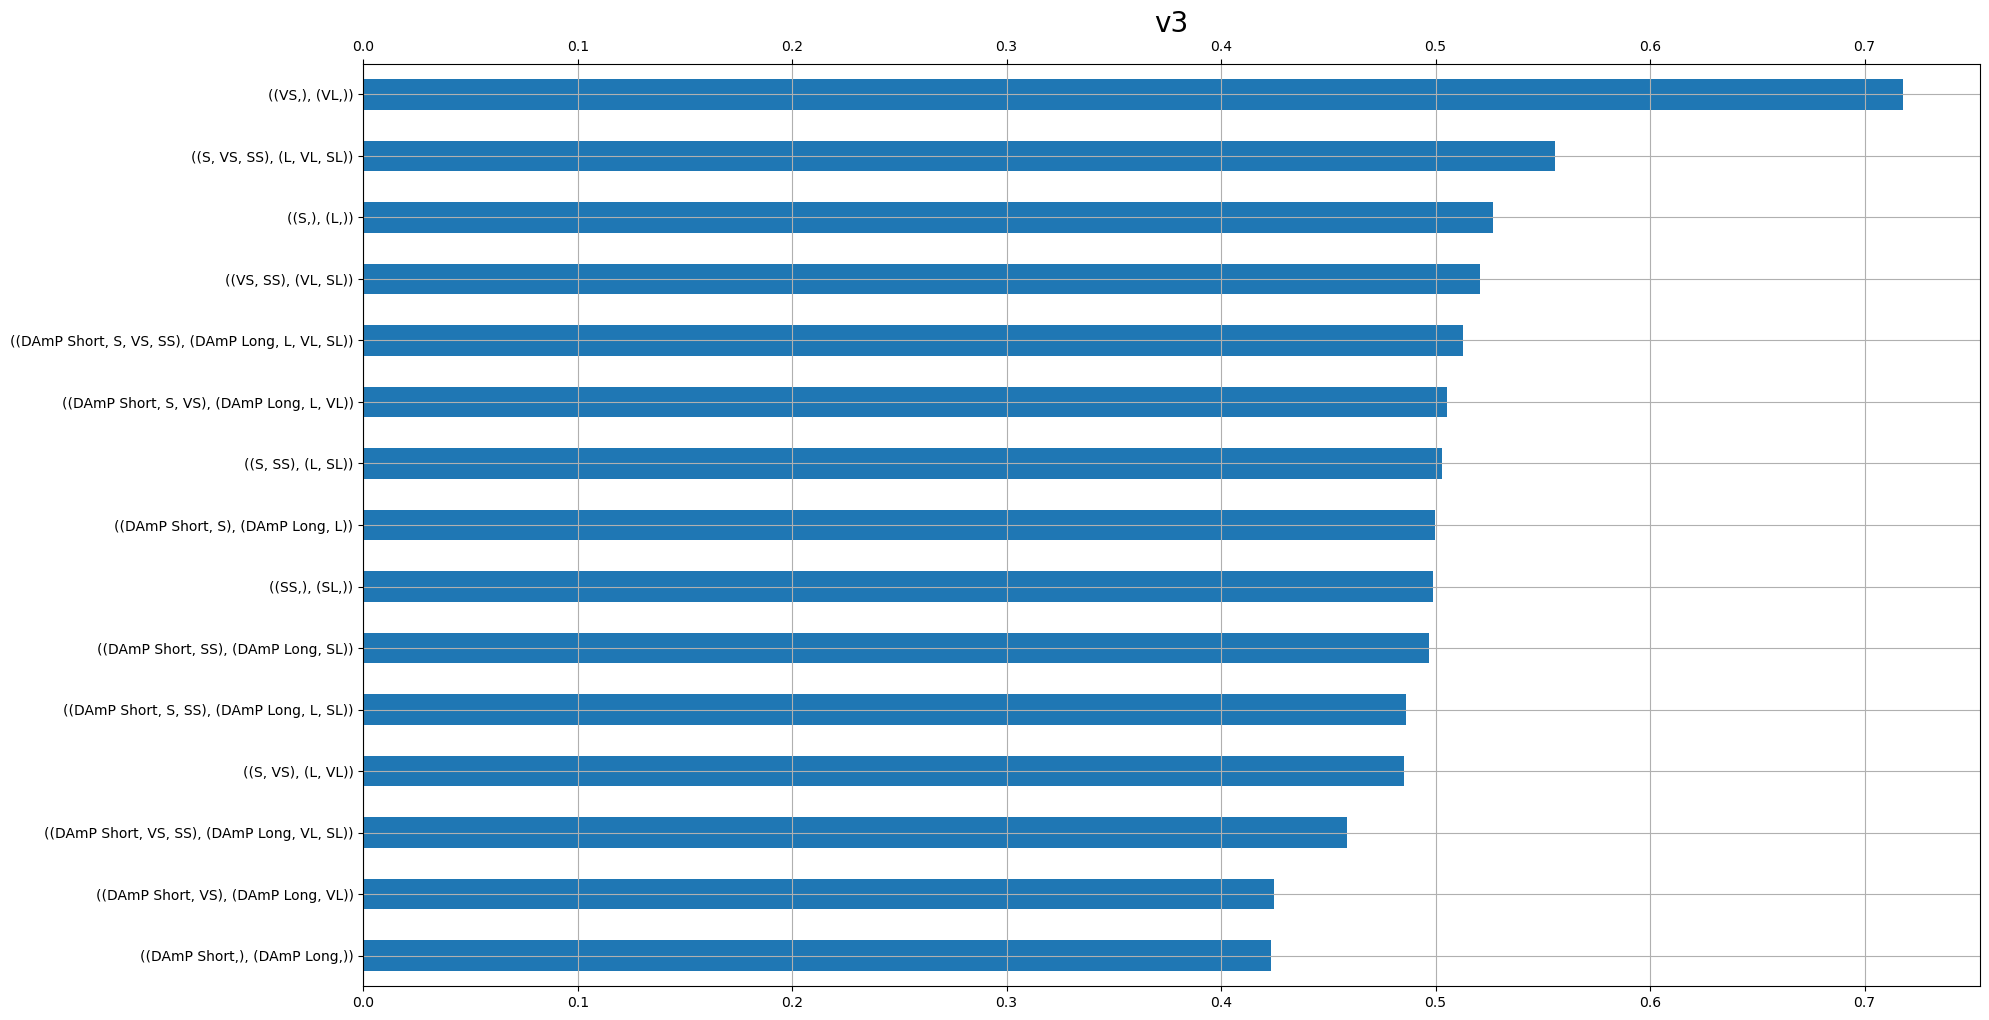

In [59]:
combos.sort_values().plot(kind='barh', figsize=(20,10), grid=True)
plt.tick_params('x', top=True, labeltop=True) 
plt.tight_layout()
plt.title('v3', fontsize='20')
plt.savefig(ANAT_VAL_OUT+'AUCs.pdf')

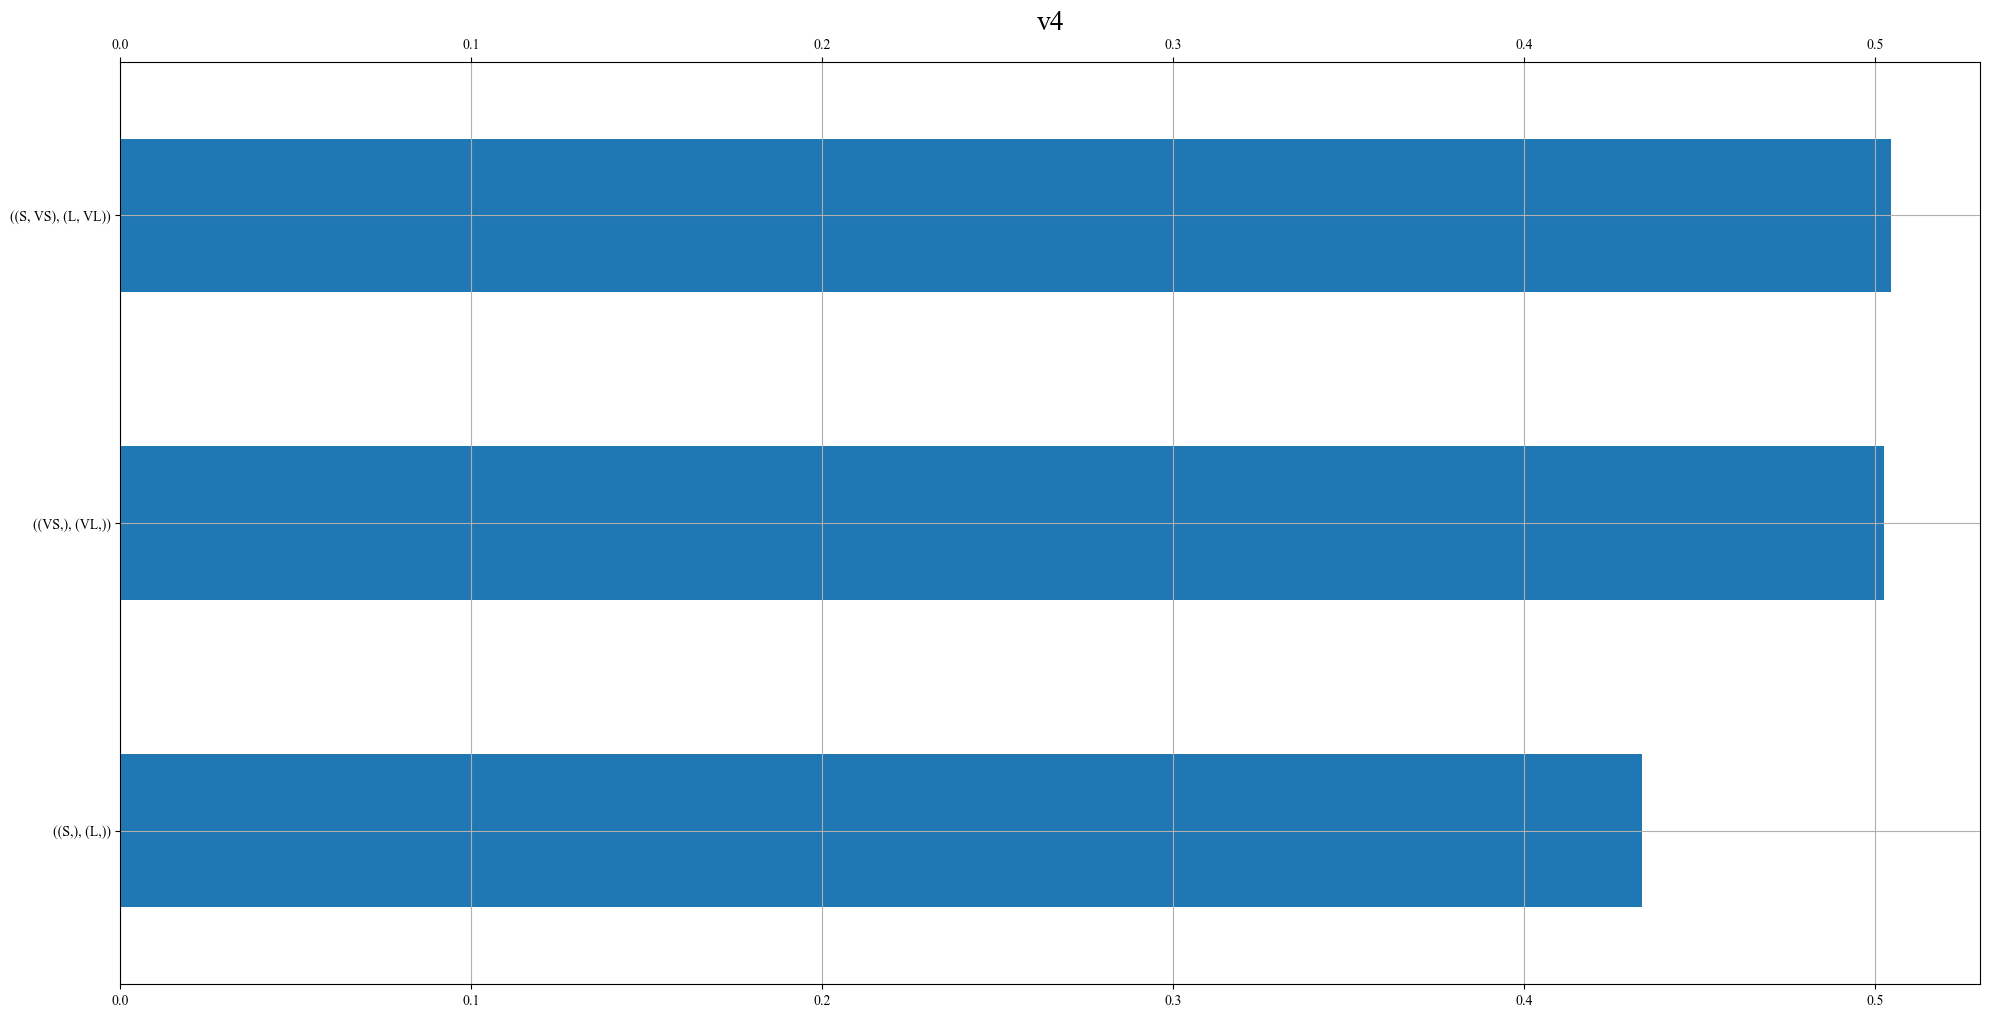

In [52]:
combos.sort_values().plot(kind='barh', figsize=(20,10), grid=True)
plt.tick_params('x', top=True, labeltop=True) 
plt.tight_layout()
plt.title('v4', fontsize=20)
plt.savefig(ANAT_VAL_OUT+'AUCs.pdf')

## TLM strong normal

# use each At pair from v4 as a feature for term T, and train a classifier with that

In [61]:
curr_anchors=np.unique(list(zip(*list(pred_phenotype_term_v4.keys())))[0])
curr_terms=np.unique(list(zip(*list(pred_phenotype_term_v4.keys())))[1])
features_table=pd.DataFrame(columns = curr_anchors, index=curr_terms)
for ATpair, value in pred_phenotype_term_v4.items():
    features_table.loc[ATpair[1]][ATpair[0]]=value

In [64]:
features_table.drop(columns=['EXO1'], index=['PIF1','RAD27','ELG1'], inplace=True) # only works with a fully connected network, otherwise we mut remove some

In [65]:
features_table

,CDC13,EST1,EST3,RAP1,RIF1,RIF2,STN1,YKU70,YKU80
ADE12,0.499752,0.497417,0.499073,0.475965,0.499699,0.499993,0.499967,0.499445,0.497836
ADO1,0.502083,0.500001,0.499999,0.500093,0.502,0.500047,0.5,0.502333,0.500117
AGP2,0.500001,0.49974,0.500033,0.502167,0.499997,0.5,0.500001,0.499991,0.500077
APE3,0.5,0.499994,0.5006,0.499997,0.500082,0.500002,0.500021,0.499999,0.5014
ARD1,0.499936,0.499964,0.500002,0.493111,0.499939,0.499999,0.5,0.499928,0.500005
...,...,...,...,...,...,...,...,...,...
YGR042W,0.500001,0.499772,0.500029,0.5019,0.499997,0.5,0.500001,0.499992,0.500068
YOR1,0.500032,0.500018,0.499999,0.503444,0.500031,0.500001,0.5,0.500036,0.499998
YPL041C,0.489688,0.499796,0.500015,0.483182,0.4901,0.499766,0.500001,0.48845,0.499979
YPL144W,0.5,0.499996,0.494179,0.5,0.499997,0.5,0.499794,0.5,0.499951


In [47]:
from train_and_vis import k_fold
from sklearn.ensemble import RandomForestClassifier

In [70]:
# Choose labels to apply among: 
all_short_tags =['DAmP Short', 'S', 'VS', 'SS']
all_short_tags =['S', 'VS']
all_long_tags = ['DAmP Long', 'L', 'VL', 'SL']
all_long_tags = ['L', 'VL']

combos = {}
best_auc=0.5
best_combo='Nobody'

for i in range(len(all_short_tags)):
    # every round of i is a different combination.
    for short_tags, long_tags in zip(itertools.combinations(all_short_tags, i+1), itertools.combinations(all_long_tags, i+1)):
        print('\n----------------------------\n',short_tags, long_tags)
        labels = pd.Series(get_labels(short_tags, long_tags, label_key))

        # 20 09 add check t drop disconected targets for tlm strong normal data
        for t in ['PIF1','RAD27','ELG1']:
            if t in labels.index:
                labels.drop(t, inplace=True)
        print(labels.value_counts())
        features = features_table.loc[labels.index]
        classifier=RandomForestClassifier()#LogisticRegression(max_iter=1000)#
        classifier, mean_fpr, mean_tpr, tprs_lower, tprs_upper,\
    aucvalue, std_AUROC =k_fold(classifier,5,features,labels, '', \
                                'nodir', metric="ROC", plot=False) 
        
        if aucvalue>= best_auc:
            best_auc=aucvalue
            best_combo=(short_tags,long_tags)
            print('*****BEST SO FAR: ',aucvalue, (short_tags,long_tags))
        else:
            if aucvalue>0.7:
                print('-> ',aucvalue, (short_tags,long_tags))
        combos[short_tags,long_tags]=aucvalue
combos= pd.Series(list(combos.values()),index=pd.MultiIndex.from_tuples(combos.keys()))
print(combos.sort_values(ascending=False))
combos.sort_values(ascending=False).to_csv(ANAT_VAL_OUT+'csv.csv')
print(TLMphenotypesdf.shape)


----------------------------
 ('S',) ('L',)
1.0    78
0.0    31
dtype: int64


C:\Users\los4\AppData\Local\Temp\ipykernel_17496\3000141833.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TLMphenotypesdf['labels'] = TLMphenotypesdf[label_key].apply(lambda x: apply_label(x,short_tags ,long_tags ))



----------------------------
 ('VS',) ('VL',)
1.0    13
0.0     5
dtype: int64


C:\Users\los4\AppData\Local\Temp\ipykernel_17496\3000141833.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TLMphenotypesdf['labels'] = TLMphenotypesdf[label_key].apply(lambda x: apply_label(x,short_tags ,long_tags ))


*****BEST SO FAR:  0.7309764309764311 (('VS',), ('VL',))

----------------------------
 ('S', 'VS') ('L', 'VL')
1    92
0    35
dtype: int64


C:\Users\los4\AppData\Local\Temp\ipykernel_17496\3000141833.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TLMphenotypesdf['labels'] = TLMphenotypesdf[label_key].apply(lambda x: apply_label(x,short_tags ,long_tags ))


(VS,)    (VL,)      0.730976
(S, VS)  (L, VL)    0.448101
(S,)     (L,)       0.432807
dtype: float64
(133, 4)


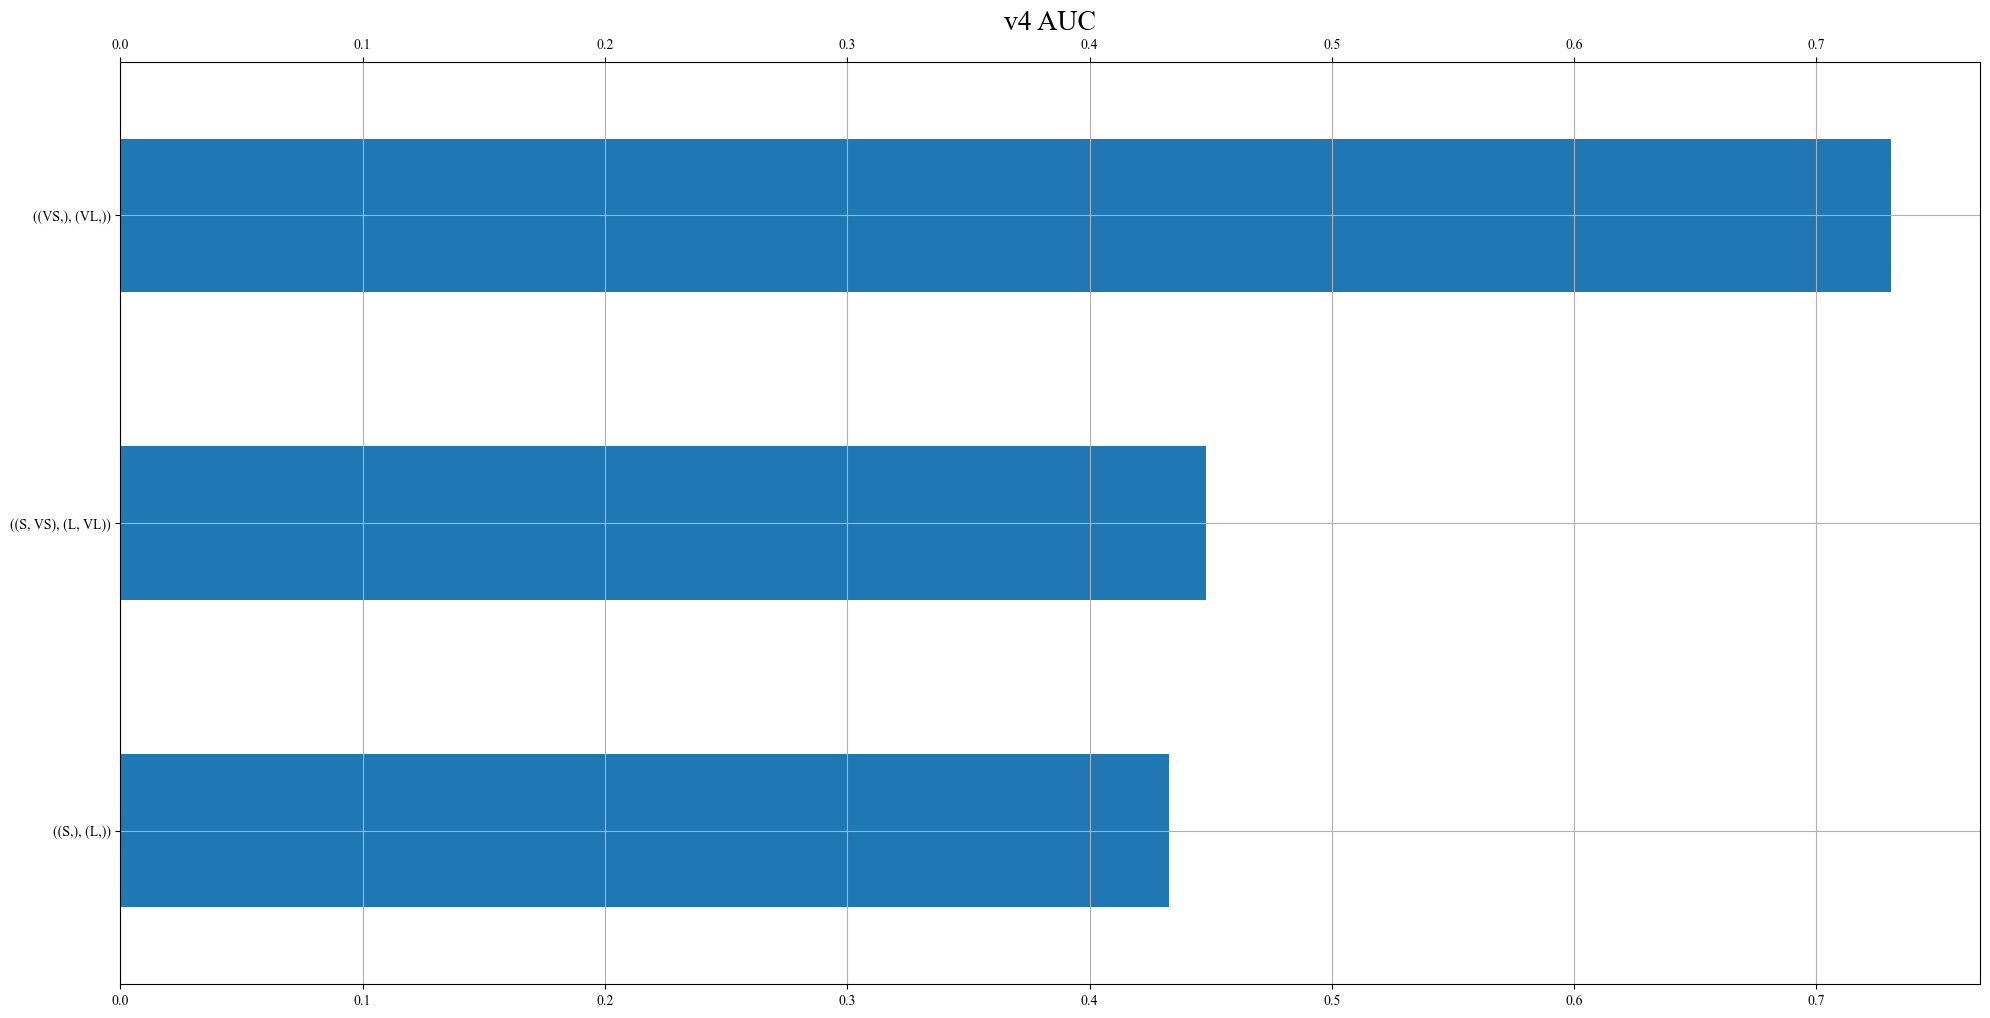

In [71]:
combos.sort_values().plot(kind='barh', figsize=(20,10), grid=True)
plt.tick_params('x', top=True, labeltop=True) 
plt.tight_layout()
plt.title('v4 AUC', fontsize=20)
plt.savefig(ANAT_VAL_OUT+'AUCsTLM_strong_normal.pdf')